# Исследование объявлений о продаже квартир


**Цель исследования** — проверить какие факторы больше всего влияют на общую (полную) стоимость объекта: 
1) изучить, зависит ли цена от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).
 
2) ответить на вопросы:
 - сколько времени занимает продажа квартиры. Когда продажу можно назвать быстрой / долгой;
 - какие факторы больше всего влияют на стоимость квартиры;
 - какая средняя стоимость квартиры в 10 населённых пунктов с наибольшим числом объявлений;
 - какие факторы влияют на стоимость квартиры в центре Санкт-Петербурга. Насколько они отличаются от данных в целом по городу;

**План исследования**

Данные о поведении пользователей находятся в файле `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки найти возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Посчитаем и добавим в таблицу новые столбцы
 4. Исследовательский анализ данных.
 5. Общий вывод.

**Описание данных**

В моём распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### 1. Откроем файл с данными и изучим общую информацию. 

In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install absl-py==1.2.0 alembic==1.6.5 anyio==3.2.1 argon2-cffi==20.1.0 astunparse==1.6.3 async-generator==1.10 attrs==21.2.0 Babel==2.9.1 backcall==0.2.0 backports.functools-lru-cache==1.6.4 beautifulsoup4==4.9.3 bleach==3.3.0 blinker==1.4 blis==0.7.8 branca==0.5.0 brotlipy==0.7.0 cachetools==5.2.0 catalogue==2.0.8 catboost==1.0.3 certifi==2022.6.15 certipy==0.1.3 cffi==1.14.5 chardet==4.0.0 click==8.1.3 convertdate==2.4.0 cryptography==3.4.7 cycler==0.11.0 cymem==2.0.6 Cython DAWG-Python==0.7.2 debugpy decorator==5.0.9 defusedxml==0.7.1 docopt==0.6.2 entrypoints==0.3 et-xmlfile==1.1.0 filelock==3.8.0 findspark==1.4.2 flatbuffers==2.0.7 folium==0.12.1.post1 fuzzywuzzy==0.18.0 gast==0.4.0 gensim==4.1.2 google-auth==2.11.0 google-auth-oauthlib==0.4.6 google-pasta==0.2.0 graphviz==0.20.1 greenlet==1.1.0 grpcio==1.47.0 gspread==5.0.0 h5py==3.7.0 hijri-converter==2.2.4 holidays==0.11.3.1 huggingface-hub==0.9.1 idna==2.10 importlib-metadata==4.6.1 ipykernel==6.0.1 ipython==7.25.0 ipython-genutils==0.2.0 ipywidgets==7.6.3 jedi==0.18.0 Jinja2==3.0.1 joblib==1.1.0 json5==0.9.5 jsonschema==3.2.0 jupyter==1.0.0 jupyter-client==6.1.12 jupyter-console==6.4.2 jupyter-contrib-core==0.4.0 jupyter-contrib-nbextensions==0.5.1 jupyter-core==4.7.1 jupyter-dash jupyter-highlight-selected-word==0.2.0 jupyter-latex-envs==1.4.6 jupyter-nbextensions-configurator==0.5.0 jupyter-server==1.9.0 jupyter-telemetry==0.1.0 jupyterhub==1.4.2 jupyterlab-pygments==0.1.2 jupyterlab-server==2.6.0 jupyterlab-widgets==3.0.2 keras==2.7.0 Keras-Preprocessing==1.1.2 kiwisolver==1.4.4 korean-lunar-calendar==0.2.1 langcodes==3.3.0 libclang==14.0.6 lightgbm==3.3.1 llvmlite==0.39.0 lxml==4.6.3 Mako==1.1.4 Markdown==3.4.1 MarkupSafe==2.1.1 matplotlib==3.3.4 matplotlib-inline==0.1.2 murmurhash==1.0.8 nbclassic==0.3.1 nbclient==0.5.3 nbconvert==6.1.0 nbformat==5.1.3 nbgrader==0.6.1 nest-asyncio==1.5.1 nltk==3.6.1 notebook==6.4.0 numba==0.56.0 numpy==1.21.1 oauthlib==3.1.1 openpyxl==3.0.9 opt-einsum==3.3.0 packaging==21.3 pamela==1.0.0 pandas==1.2.4 pandocfilters==1.4.2 parso==0.8.2 pathy==0.6.2 patsy==0.5.2 pexpect==4.8.0 pickleshare==0.7.5 Pillow==8.4.0 plotly==5.4.0 preshed==3.0.7 prometheus-client==0.11.0 prompt-toolkit==3.0.19 protobuf==3.19.4 psycopg2-binary==2.9.2 ptyprocess==0.7.0 py4j==0.10.9 pyarrow==5.0.0 pyasn1==0.4.8 pyasn1-modules==0.2.8 pycosat==0.6.3 pycparser==2.20 pydantic==1.8.2 Pygments==2.9.0 PyJWT==2.1.0 PyMeeus==0.5.11 pymorphy2==0.9.1 pymorphy2-dicts-ru==2.4.417127.4579844 pymystem3==0.2.0 pyod==0.9.5 pyOpenSSL==20.0.1 pyparsing==2.4.7 PySocks==1.7.1 pyspark==3.0.2 python-editor==1.0.4 python-json-logger==2.0.1 pytz==2021.1 PyYAML==6.0 qtconsole==5.3.2 QtPy==2.2.0 regex==2022.8.17 requests==2.25.1 requests-oauthlib==1.3.1 requests-unixsocket==0.2.0 rsa==4.9 ruamel.yaml==0.17.10 ruamel.yaml.clib==0.2.2 sacremoses==0.0.53 scikit-learn==0.24.1 scipy==1.9.1 seaborn==0.11.1 setuptools==49.6.0 six==1.16.0 smart-open==5.2.1 sniffio==1.2.0 soupsieve==2.3.2.post1 spacy==3.2.0 spacy-legacy==3.0.10 spacy-loggers==1.0.3 SQLAlchemy==1.4.20 srsly==2.4.4 statsmodels==0.13.2 tenacity==8.0.1 tensorboard==2.10.0 tensorboard-data-server==0.6.1 tensorboard-plugin-wit==1.8.1 tensorflow-cpu==2.7.0 tensorflow-estimator==2.7.0 tensorflow-io-gcs-filesystem==0.26.0 termcolor==1.1.0 terminado==0.10.1 testpath==0.5.0 thinc==8.0.17 threadpoolctl==3.1.0 tokenizers==0.10.3 torch==1.10.0 tqdm==4.61.2 transformers==4.12.5 typer==0.4.2 typing-extensions==4.3.0 urllib3==1.26.6 wasabi==0.10.1 wcwidth==0.2.5 webencodings==0.5.1 websocket-client==0.57.0 Werkzeug==2.2.2 wheel==0.36.2 widgetsnbextension==3.5.2 wrapt==1.14.1 xgboost==1.5.1 xlrd==2.0.1 xmltodict==0.12.0 zipp==3.5.0

  Using cached absl_py-1.2.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached alembic-1.6.5-py2.py3-none-any.whl.metadata (7.0 kB)
  Using cached anyio-3.2.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached argon2-cffi-20.1.0.tar.gz (1.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached async_generator-1.10-py3-none-any.whl.metadata (4.9 kB)
  Using cached attrs-21.2.0-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached Babel-2.9.1-py2.py3-none-any.whl.metadata (1.2 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached backports.functools_lru_cache-1.6.4-py2.py3-none-any.whl.metadata (

ERROR: Ignored the following yanked versions: 0.1.1
ERROR: Could not find a version that satisfies the requirement catboost==1.0.3 (from versions: 1.2, 1.2.1, 1.2.2, 1.2.3)
ERROR: No matching distribution found for catboost==1.0.3


In [4]:
import pandas as pd #импорт библиотеки pandas
import matplotlib.pyplot as plt #библиотека для построения 2D-графиков
import numpy as np #библиотека для математических и числовых операций с разными типами данных
import seaborn as sns #библиотека для создания информативных статистических графиков
import warnings

In [5]:
# чтение csv-файл
try:
    data = pd.read_csv("real_estate_data.csv", sep='\t')
except:
    data = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')

**1.1 Посмотрим начало и конец датафрейма, а также сведения о датафрейме**

In [6]:
#вывод первых 10 строк датафрейма
data.head(10) 

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   
2             NaN           5.0        34.30      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0        32.00     13          NaN  ...   
5             NaN          12.0        14.40      5          NaN  ...   
6             NaN          26.0        10.60      6          NaN  ...   
7             NaN          24.0          NaN     22          NaN  ...   
8             NaN          27.0        15.43     26          NaN  ...   
9            2.50           9.0        43.60      7          NaN  ...   

   kitchen_area  balcony              locality_name  airports_nearest  \
0         25.00      NaN            Санкт-Петербург           18863.0   
1         11.00      2.0             посёлок Шушары           12817.0   
2          8.30      0.0            Санкт-Петербург           21741.0   
3           NaN      0.0            Санкт-Петербург           28098.0   
4         41.00      NaN            Санкт-Петербург           31856.0   
5          9.10      NaN  городской посёлок Янино-1               NaN   
6         14.40      1.0          посёлок Парголово           52996.0   
7         18.90      2.0            Санкт-Петербург           23982.0   
8          8.81      NaN             посёлок Мурино               NaN   
9          6.50      2.0            Санкт-Петербург           50898.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   
5                 NaN               NaN            NaN               NaN   
6             19143.0               0.0            NaN               0.0   
7             11634.0               0.0            NaN               0.0   
8                 NaN               NaN            NaN               NaN   
9             15008.0               0.0            NaN               0.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0  
9            NaN            289.0  

[10 rows x 22 columns]

In [7]:
#вывод последних 10 строк датафрейма
data.tail(10) 

total_images  last_price  total_area first_day_exposition  rooms  \
23689            13   3550000.0       35.30  2018-02-28T00:00:00      1   
23690             3   5500000.0       52.00  2018-07-19T00:00:00      2   
23691            11   9470000.0       72.90  2016-10-13T00:00:00      2   
23692             2   1350000.0       30.00  2017-07-07T00:00:00      1   
23693             9   4600000.0       62.40  2016-08-05T00:00:00      3   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
23689            2.86          15.0         16.3      4          NaN  ...   
23690             NaN           5.0         31.0      2          NaN  ...   
23691            2.75          25.0         40.3      7          NaN  ...   
23692             NaN           5.0         17.5      4          NaN  ...   
23693            2.60           9.0         40.0      8          NaN  ...   
23694            3.70           5.0         73.3      3          NaN  ...   
23695             NaN           5.0         38.0      4          NaN  ...   
23696             NaN           3.0         29.7      1          NaN  ...   
23697            3.00          17.0          NaN     12          NaN  ...   
23698            2.50           5.0         12.3      1          NaN  ...   

       kitchen_area  balcony        locality_name  airports_nearest  \
23689          9.10      2.0      Санкт-Петербург           17284.0   
23690          6.00      NaN      Санкт-Петербург           20151.0   
23691         10.60      1.0      Санкт-Петербург           19424.0   
23692          6.00      NaN               Тихвин               NaN   
23693          8.00      0.0             Петергоф           45602.0   
23694         13.83      NaN      Санкт-Петербург           24665.0   
23695          8.50      NaN                Тосно               NaN   
23696           NaN      NaN     село Рождествено               NaN   
23697         23.30      2.0      Санкт-Петербург           39140.0   
23698          9.00      NaN  поселок Новый Учхоз               NaN   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
23689             16081.0               1.0          353.0               2.0   
23690              6263.0               1.0          300.0               0.0   
23691              4489.0               0.0            NaN               1.0   
23692                 NaN               NaN            NaN               NaN   
23693             34104.0               1.0          352.0               1.0   
23694              4232.0               1.0          796.0               3.0   
23695                 NaN               NaN            NaN               NaN   
23696                 NaN               NaN            NaN               NaN   
23697             10364.0               2.0          173.0               3.0   
23698                 NaN               NaN            NaN               NaN   

       ponds_nearest  days_exposition  
23689          652.0             29.0  
23690            NaN             15.0  
23691          806.0            519.0  
23692            NaN            413.0  
23693          675.0            239.0  
23694          381.0              NaN  
23695            NaN             45.0  
23696            NaN              NaN  
23697          196.0            602.0  
23698            NaN              NaN  

[10 rows x 22 columns]

In [8]:
#выведем основную информацию о датафрейме с помощью метода info()
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
#выведем количество пропущенных значений для каждого столбца. 
data.isna().sum().sort_values() 

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [10]:
#посмотрим есть ли явные дубликаты
data.duplicated().sum() 

0

In [11]:
#выведем информацию о статистических характеристиках датафрема методом describe()
data.describe() 

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

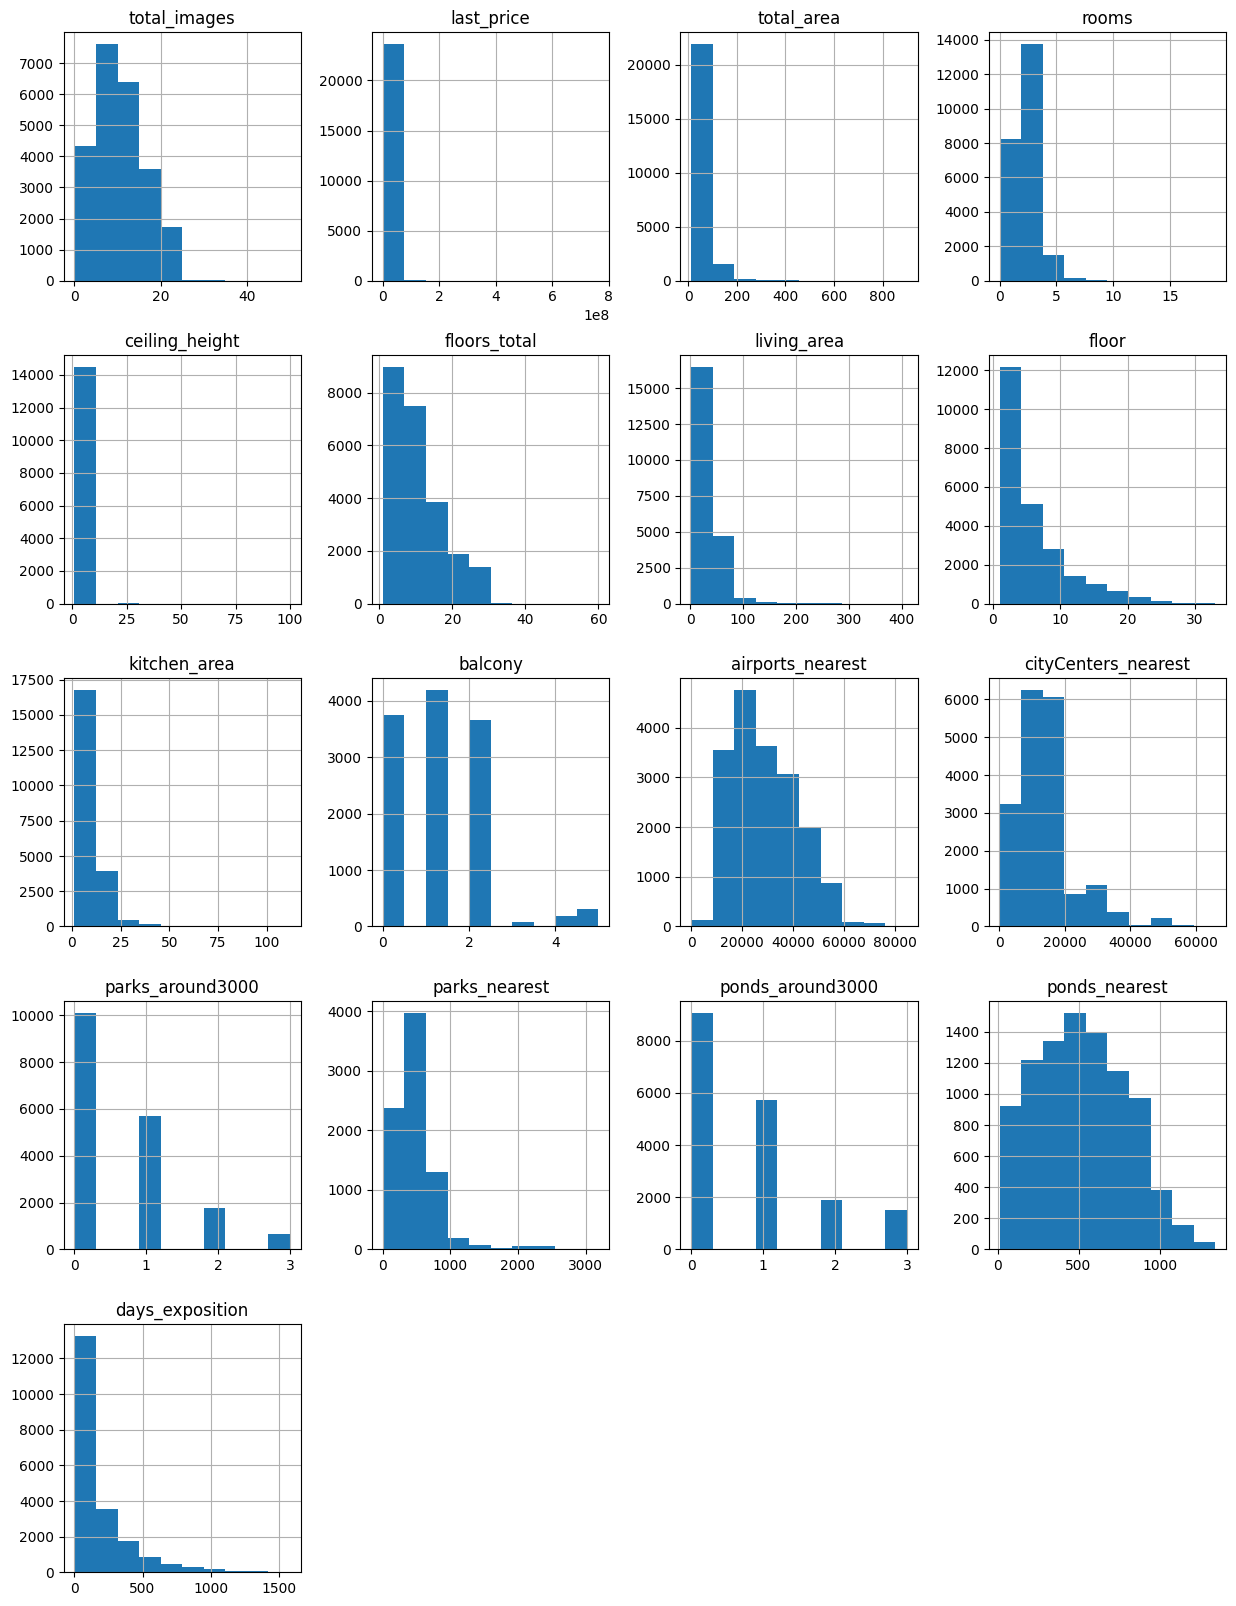

In [12]:
 #построим общую гистограмму всех столбцов таблицы
data.hist(figsize=(15, 20));

In [13]:
len(data)

23699

В таблице 23699 строк и 22 столбца. В четырнадцати столбцах таблицы есть пропуски. Типы данных не соответствуют заявленным. Например, в 'open_plan' тип данных - 'object', вместо - 'bool'; в 'first_day_exposition' тип данных - 'object' вместо "datetime64".  
Явных дубликатов в данных нет, но есть выбросы, например, высота потолков (ceiling_height) 1 метр и 100 метров; жилая площадь (living_area) - 2 м²; площадь кухни (kitchen_area) - 1,3 м²; число комнат (rooms) - 0.

In [14]:
# посмотрим длину датасета
len(data)

23699

### 2. Предобработка данных

**2.1 Изменение типов данных.**

Тип данных необходимо изменить в столбцах 'first_day_exposition','floors_total', 'balcony', 'parks_around3000', 'ponds_around3000' и 'days_exposition'**

In [15]:
#преобразуем тип данных в столбцах 'first_day_exposition', 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition'.

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['days_exposition'] = data['days_exposition'].round()

for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[column] = data[column].astype('Int64')


In [16]:
#проверим изменился ли тип данных в столбцах 'first_day_exposition','floors_total', 'balcony', 'parks_around3000', 'ponds_around3000' и 'days_exposition'
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**2.2 Заполним пропущенные значения там где это возможно.** 

Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. 
Аналогично для столбцов "число парков в радиусе 3 км"('parks_around3000') и "число водоёмов в радиусе 3 км"('ponds_around3000')

In [17]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [18]:
for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[column] = data[column].fillna(0)

In [19]:
#проверим что в столбцах 'balcony', 'parks_around3000', 'ponds_around3000' не осталось пропусков
data.isna().sum().sort_values() 

total_images                0
ponds_around3000            0
parks_around3000            0
balcony                     0
open_plan                   0
floor                       0
studio                      0
rooms                       0
first_day_exposition        0
total_area                  0
last_price                  0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

**2.3 Изучим уникальные значения в столбце с названиями населённых пунктов 'locality_name'**

In [20]:
#отсортируем и выведем уникальные значения в столбце 'locality_name'
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [21]:
#заменим названия в столбце 'locality_name'. Для этого заменим 'ё' на 'е' и 'городской поселок' на 'поселок городского типа' 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [22]:
#отсортируем и выведем уникальные значения в столбце 'locality_name' повторно
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [23]:
#приведём все значения столбца 'locality_name'к нижнему регистру
locality_name_lower = data['locality_name'].str.lower()

In [24]:
#найдём количество пропуско в столбце 'locality_name'
data['locality_name'].isnull().sum()

49

In [25]:
#в столбце 'locality_name' 49 пропущенных значений. Удалим эти пропуски, так как без названия населенного пункта остальные данные теряют значение
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [26]:
#убедимся что в столбце 'locality_name' не осталось пропусков
data.isna().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [27]:
#преобразуем наименование столбца 'cityCenters_nearest' в змеиный регистр
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', \
                            'parks_around3000':'parks_around_3000',\
                            'ponds_around3000':'ponds_around_3000'  })

In [28]:
data.describe()

total_images    last_price    total_area  \
count  23650.000000  2.365000e+04  23650.000000   
mean       9.862326  6.541127e+06     60.329069   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.400000e+06     40.000000   
50%        9.000000  4.650000e+06     52.000000   
75%       14.000000  6.799000e+06     69.700000   
max       50.000000  7.630000e+08    900.000000   
std        5.682278  1.089640e+07     35.661808   

                first_day_exposition         rooms  ceiling_height  \
count                          23650  23650.000000    14490.000000   
mean   2017-11-10 00:03:57.463002112      2.070106        2.771287   
min              2014-11-27 00:00:00      0.000000        1.000000   
25%              2017-05-15 00:00:00      1.000000        2.520000   
50%              2017-12-12 00:00:00      2.000000        2.650000   
75%              2018-08-27 00:00:00      3.000000        2.800000   
max              2019-05-03 00:00:00     19.000000      100.000000   
std                              NaN      1.078620        1.261593   

       floors_total   living_area         floor  kitchen_area   balcony  \
count       23565.0  21752.000000  23650.000000  21381.000000   23650.0   
mean      10.675875     34.448356      5.893277     10.566403  0.591712   
min             1.0      2.000000      1.000000      1.300000       0.0   
25%             5.0     18.600000      2.000000      7.000000       0.0   
50%             9.0     30.000000      4.000000      9.100000       0.0   
75%            16.0     42.300000      8.000000     12.000000       1.0   
max            60.0    409.700000     33.000000    112.000000       5.0   
std        6.594823     22.037664      4.883317      5.901753  0.959662   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      18116.000000          18139.000000            23650.0   
mean       28803.225878          14197.860742           0.469091   
min            0.000000            181.000000                0.0   
25%        18575.750000           9241.000000                0.0   
50%        26756.500000          13105.000000                0.0   
75%        37294.000000          16293.000000                1.0   
max        84869.000000          65968.000000                3.0   
std        12637.314144           8606.830295           0.748458   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    8064.000000            23650.0    9085.000000          20470.0  
mean      490.830729           0.590359     518.059879         180.7532  
min         1.000000                0.0      13.000000              1.0  
25%       288.000000                0.0     293.000000             45.0  
50%       454.500000                0.0     502.000000             95.0  
75%       612.000000                1.0     730.000000            231.0  
max      3190.000000                3.0    1344.000000           1580.0  
std       342.554386           0.883539     277.841733       219.777916

**2.4 Изучим столбец 'ceiling_height'**

Найдём и устраним редкие и выбивающиеся значения. В столбце ceiling_height указана высота потолков, например, 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. 

In [29]:
#отсортируем и выведем уникальные значения в столбце 'ceiling_height'
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [30]:
#выведем информацию о статистических характеристиках столбца 'ceiling_height'
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце 'ceiling_height' почти тысяча пропущенных значений. Посмотрим диаграмму размаха высоты потолков

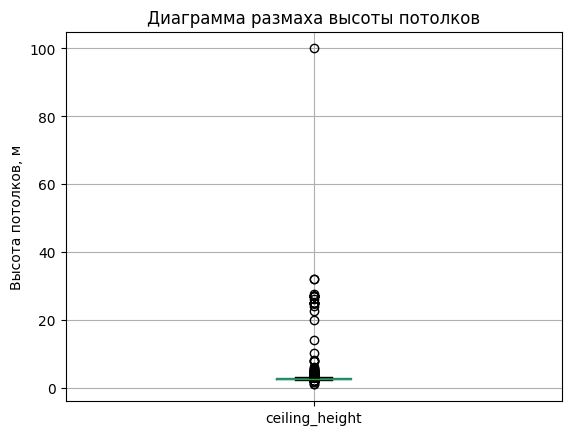

In [31]:
plt.title('Диаграмма размаха высоты потолков')
data.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков, м')
plt.show()

 Посчитаем количество значений в столбце менее 2 м, от 2 до 2,5 м, более 10 м и более 25 м

In [32]:
print('Количество значений в столбце ceiling_height менее 2 м:', len(data[data['ceiling_height'] < 2.0]))

Количество значений в столбце ceiling_height менее 2 м: 3


In [33]:
print('Количество значений в столбце ceiling_height от 2 до 2,5 м:',len(data[(data['ceiling_height'] < 2.5)&(data['ceiling_height'] >= 2.0)]))

Количество значений в столбце ceiling_height от 2 до 2,5 м: 70


In [34]:
print('Количество значений в столбце ceiling_height более 10 м:',len(data[data['ceiling_height'] > 10.0]))

Количество значений в столбце ceiling_height более 10 м: 25


In [35]:
print('Количество значений в столбце ceiling_height более 25 м:',len(data[data['ceiling_height'] >= 25.0]))

Количество значений в столбце ceiling_height более 25 м: 20


In [36]:
#посмотрим аномальные значения высот менее 2 и более 10 м
data.query('ceiling_height < 2 or ceiling_height > 10').head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
355             17   3600000.0        55.2           2018-07-12      2   
3144            14   2900000.0        75.0           2018-11-12      3   
4636             0   4300000.0        45.0           2018-02-01      2   
4868             7   3000000.0        25.0           2017-09-27      0   
5068             0   3850000.0        30.5           2018-10-03      1   
5238             0   2500000.0        54.0           2017-10-13      2   
5660             4   4400000.0        50.0           2017-08-08      2   
5702             5   1500000.0        42.8           2017-08-14      2   
5797            17   8150000.0        80.0           2019-01-09      2   
6236             6   3300000.0        44.4           2019-03-25      2   

      ceiling_height  floors_total  living_area  floor is_apartment  ...  \
355             25.0             5         32.0      2        False  ...   
3144            32.0             3         53.0      2          NaN  ...   
4636            25.0             9         30.0      2          NaN  ...   
4868            27.0            25         17.0     17          NaN  ...   
5068            24.0             5         19.5      1         True  ...   
5238            27.0             5         30.0      3          NaN  ...   
5660            26.0             9         21.3      3          NaN  ...   
5702             1.2             2         27.5      1          NaN  ...   
5797            27.0            36         41.0     13          NaN  ...   
6236            25.0             5         31.3      5          NaN  ...   

      kitchen_area  balcony                locality_name  airports_nearest  \
355            NaN        2                      Гатчина               NaN   
3144           8.0        0                       Волхов               NaN   
4636           7.0        1              Санкт-Петербург           12016.0   
4868           NaN        2               поселок Мурино               NaN   
5068           5.5        0              Санкт-Петербург           29686.0   
5238           9.0        2                 деревня Мины               NaN   
5660           7.0        2              Санкт-Петербург           28981.0   
5702           5.2        0  поселок городского типа Мга               NaN   
5797          12.0        5              Санкт-Петербург           18732.0   
6236           5.7        0                    Кронштадт           68923.0   

     city_centers_nearest  parks_around_3000  parks_nearest  \
355                   NaN                  0            NaN   
3144                  NaN                  0            NaN   
4636              13256.0                  1          658.0   
4868                  NaN                  0            NaN   
5068               8389.0                  3          397.0   
5238                  NaN                  0            NaN   
5660              10912.0                  1          305.0   
5702                  NaN                  0            NaN   
5797              20444.0                  0            NaN   
6236              50649.0                  1          417.0   

      ponds_around_3000  ponds_nearest  days_exposition  
355                   0            NaN              259  
3144                  0            NaN             <NA>  
4636                  1          331.0              181  
4868                  0            NaN               28  
5068                  1          578.0                7  
5238                  0            NaN              540  
5660                  0            NaN              267  
5702                  0            NaN              248  
5797                  3           80.0               38  
6236                  2           73.0             <NA>  

[10 rows x 22 columns]

In [37]:
#посчитаем количество строк в столбце ceiling_height менее 2 и более 10
data.query('ceiling_height < 2 or ceiling_height > 10')['ceiling_height'].count()

28

Высота потолков зависит от года постройки жилья и его типа, а следовательно нормативных правовых актов применяемых на момент постройки дома. Пропуски в данном столбце заполнять средним или медианным значением нелогично, так как сильно разнятся года постройки домов. Однако, квартиры с высотой потолка 10 м и выше редкость. Предположим, что эти начения изначально были указаны без запятой, поэтому разделим их на 10 и сохраним в датафрейме. 

Значения для корректировки выберем в интервале от 25 до 100. "25". 2,5 м - это минимальная высота (от пола до потолка) жилых комнат и кухни (кухни-столовой) по "СП 54.13330.2022. Свод правил. Здания жилые многоквартирные. СНиП 31-01-2003" (утв. и введен в действие Приказом Минстроя России от 13.05.2022 N 361/пр). 100 м - максимальная высота потолка в исследуемом датафрейме.

In [38]:
data.loc[data['ceiling_height'] >= 25.0, 'ceiling_height'] = data['ceiling_height']/10

Удалим аномальные значение 2.5 м и менее и более 10 м из ячеек (замемним аномальные данные на nan). Строки с данными оставим и  попробуем восстановить высоту потолков в них на следующем этапе. Например, проверим зависимость высоты потолков от местарасположения объекта недвижимости.

In [39]:
#удалим аномальные значение из ячеек (замемним аномальные данные на nan) попробуем восстановить данные в них на следующем этапе
#проверим, что замена произошла, оценим как изменились сведения о статистических характеристиках датафрема
data.loc[(data['ceiling_height'] < 2.5), 'ceiling_height'] = np.nan
data.loc[(data['ceiling_height'] > 10), 'ceiling_height'] = np.nan
data['ceiling_height'].describe()

count    14412.000000
mean         2.730284
std          0.297736
min          2.500000
25%          2.520000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Построим обновлённую диаграмму размаха высоты потолков.

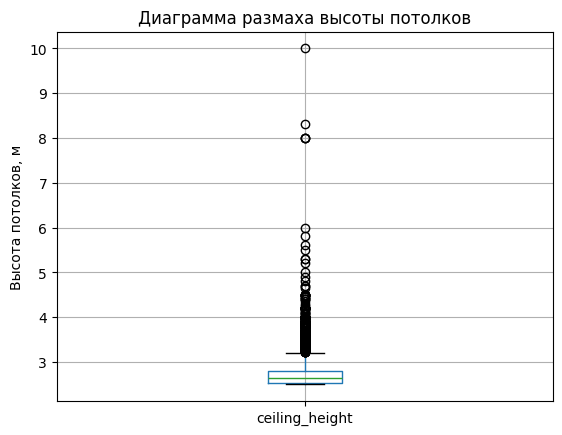

In [40]:
plt.title('Диаграмма размаха высоты потолков')
data.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков, м')
plt.show()

In [41]:
print('Количество значений в столбце ceiling_height более 6 м:', len(data[data['ceiling_height'] > 6.0]))

Количество значений в столбце ceiling_height более 6 м: 5


Выбросов в столбце ceiling_height, а имено значений более 6 метров, немного - 5. Возможно это двухуровненые квартиры с общей высотой потолка более 6 м. На общую выборку эти значения влияют незначительно, пока удалять их не будем.

Восстановим пропущенные значения столбца'ceiling_height'. 
    Высота потолков будет варьироваться в зависимости от района Санкт-Петербурга, например в исторических районах она будет больше, чем в современных.  

In [42]:
#выведем список населённых пунктов с количеством объявлений:
data.value_counts('locality_name')

locality_name
Санкт-Петербург           15721
поселок Мурино              556
поселок Шушары              440
Всеволожск                  398
Пушкин                      369
                          ...  
поселок Белоостров            1
поселок Высокоключевой        1
поселок Гладкое               1
поселок Гончарово             1
село Шум                      1
Name: count, Length: 323, dtype: int64

In [43]:
#посмотрим в каких городах есть пропуски в столбце ceiling_height
data.query('ceiling_height.isnull()')['locality_name'].value_counts()

locality_name
Санкт-Петербург       5655
поселок Мурино         342
поселок Шушары         223
поселок Парголово      191
деревня Кудрово        177
                      ... 
поселок Алексеевка       1
поселок Белоостров       1
деревня Пельгора         1
деревня Фалилеево        1
деревня Тихковицы        1
Name: count, Length: 262, dtype: int64

Значительная доля продаваемых объектов недвижимости и большая чать пропущенных значений находится в Санкт-Петербурге. Для более объективного выделения характерных закономерностей разобьем данные на 2 группы - объекты, находящиеся в СПб и объекты за его пределами.
    
Для восстановления пропусков для объектов за пределами СПб заполним их медианой. 
        Для востановления данных столбца 'ceiling_height' по Санкт-Петербургу такой метод не подходит, так как разнятся года постройки домов, а следовательно и высоты потолков. Построим график зависимости высоты потолка для каждого км.

In [44]:
# выводим количество пустых значений по каждой группе
not_spb_filter = data['locality_name'] != 'Санкт-Петербург'
print('not_spb:', data.loc[not_spb_filter, 'ceiling_height'].isna().sum())
print('spb:', data.loc[~not_spb_filter, 'ceiling_height'].isna().sum())

not_spb: 3583
spb: 5655


In [45]:
#добавим столбец расстояние до центра города в километрах (переведём из м в км и округлим до целых значений):
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

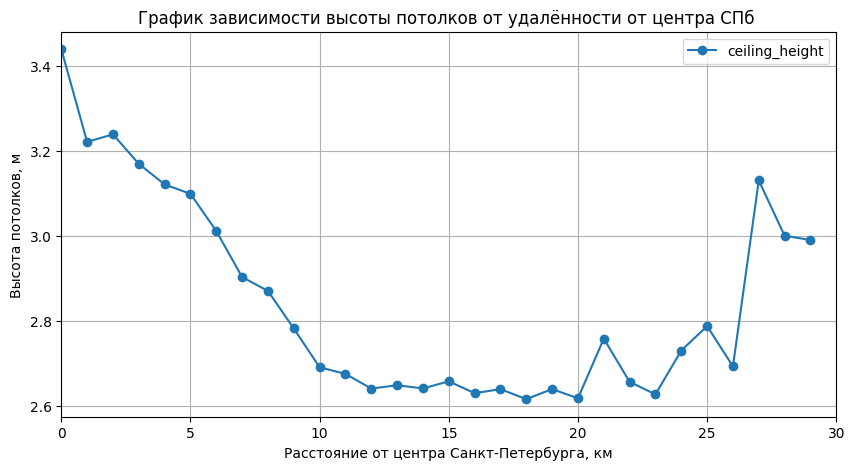

In [46]:
#построим графики, где указана средняя высота для каждого км 
# (от 0 до 30 км от центра Санкт-Петербург согласно данным статистики)
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='ceiling_height')
    .plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 5))
);
plt.title('График зависимости высоты потолков от удалённости от центра СПб ')
plt.xlabel("Расстояние от центра Санкт-Петербурга, км");
plt.ylabel("Высота потолков, м");

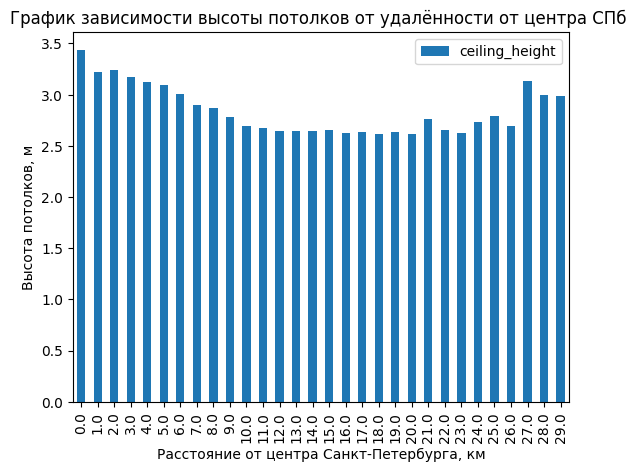

In [47]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='ceiling_height')
    .plot(kind='bar')
);
plt.title('График зависимости высоты потолков от удалённости от центра СПб ')
plt.xlabel("Расстояние от центра Санкт-Петербурга, км");
plt.ylabel("Высота потолков, м");

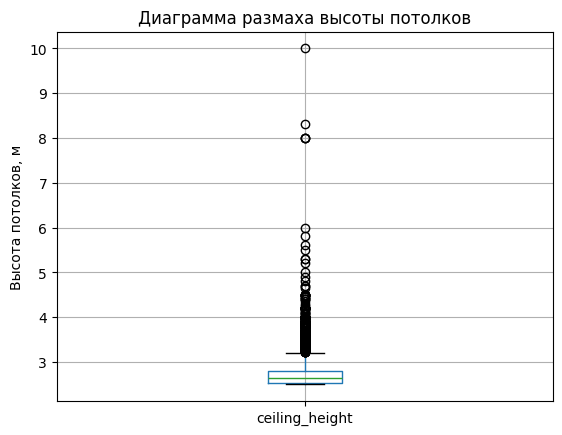

In [48]:
plt.title('Диаграмма размаха высоты потолков')
data.boxplot(column=['ceiling_height'], figsize=(10,5), grid=True)
plt.ylabel('Высота потолков, м')
plt.show()

**По выбивающимся точкам графика проведем категоризацию объявлений в Санкт-Петербурге и за его пределами и выделим следующие категории:**
- Центр СПБ в радиусе до 2 (расстояние от центра 0 - 2 км включительно);
- Центр СПБ в радиусе 2 - 8 (расстояние от центра от 2 до 8 км включительно);
- Районы СПБ в радиусе 8 - 10 (расстояние от центра от 8 до 10 км включительно);
- Районы СПБ в радиусе 10 - 27 (расстояние от центра от 10 не включая 27 км);
- Район СПБ в радиусе 27 (расстояние от центра 27 км, так как в этом районе на графике резкий рост высот);
- Районы СПБ в радиусе 28 - 30 (расстояние от центра от 28 до 30 км);
- ЛО (объявления за пределами Санкт-Петербурга)

Добавим столбец 'category_center' в датафрейм. Найдём среднюю высоту потолка для каждой выделенной категории. Получаем следующие данные:

In [49]:
# #описываем функцию для категоризации районов СПб
def category_center(row):
    try:
        if 0 <= row["city_centers_nearest_km"] <= 2 and row['locality_name'] == "Санкт-Петербург":
            return 'Центр СПБ в радиусе до 2 км от центра'
        elif 2 < row['city_centers_nearest_km'] <= 8 and row['locality_name'] == "Санкт-Петербург":
            return 'Центр СПБ в радиусе 2 - 8 км от центра'
        elif 8 < row['city_centers_nearest_km'] <= 10 and row['locality_name'] == "Санкт-Петербург":
            return 'Районы СПБ в радиусе 8 - 10 км от центра'
        elif 10 < row['city_centers_nearest_km'] < 27 and row['locality_name'] == "Санкт-Петербург":
            return 'Районы СПБ в радиусе 10 - 27 км от центра'
        elif 27 <= row['city_centers_nearest_km'] <28 and row['locality_name'] == "Санкт-Петербург":
            return 'Район СПБ в радиусе 27 км от центра'
        elif 28 <= row['city_centers_nearest_km'] <= 30 and row['locality_name'] == "Санкт-Петербург":
            return 'Районы СПБ в радиусе 28-30 км от центра'
        elif row['locality_name'] != "Санкт-Петербург":
            return 'ЛО'
        else:'Другие'
    except:
        'нет данных'
data['category_center'] = data.apply(category_center, axis=1)

In [50]:
# вывод средних значений высот потолка('ceiling_height') сгруппированных в зависимости о месторасположения (категории)
data.groupby('category_center')['ceiling_height'].median().sort_values(ascending=False)

category_center
Центр СПБ в радиусе до 2 км от центра        3.200
Район СПБ в радиусе 27 км от центра          3.130
Центр СПБ в радиусе 2 - 8 км от центра       3.000
Районы СПБ в радиусе 28-30 км от центра      2.875
Районы СПБ в радиусе 8 - 10 км от центра     2.700
ЛО                                           2.600
Районы СПБ в радиусе 10 - 27 км от центра    2.600
Name: ceiling_height, dtype: float64

In [53]:
#все пропуски высот заполним медианой для каждой категории месторасположения от центра, если значения 'city_centers_nearest_km' не NaN
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('category_center')['ceiling_height'].transform('median'))

In [54]:
# проверим остались ли пустые значения по каждой группе (СПб и "неСПб")
print('spb:', data.loc[~not_spb_filter, 'ceiling_height'].isna().sum())
print('not_spb:', data.loc[not_spb_filter, 'ceiling_height'].isna().sum())

spb: 30
not_spb: 0


In [55]:
data.loc[not_spb_filter,['city_centers_nearest_km']].min()

city_centers_nearest_km    17.0
dtype: float64

In [56]:
data.loc[~not_spb_filter,['city_centers_nearest_km']].max()

city_centers_nearest_km    29.0
dtype: float64

In [57]:
#проверка незаполненных значений
#в столбце ceiling_height остались пропуски, там где 'city_centers_nearest_km' незизвестно
# рассмотрим эти значения подробнее
test_ind = data.loc[(data['locality_name']=='Санкт-Петербург') & (data['city_centers_nearest_km'].isna()==True)].index

In [58]:
data.loc[test_ind]

total_images   last_price  total_area first_day_exposition  rooms  \
81                9   10949000.0       68.00           2018-12-27      1   
593              20    4200000.0       38.30           2019-04-16      1   
604              11    9899000.0      101.00           2018-12-12      3   
742               7   37000000.0      161.00           2016-05-22      3   
795              19    7100000.0       59.60           2019-02-13      2   
...             ...          ...         ...                  ...    ...   
21625             9    4500000.0       34.30           2019-03-04      1   
21837            15   44500000.0      169.00           2019-02-28      3   
21910            19  130000000.0      431.00           2017-10-02      7   
22508             5    3415000.0       31.65           2019-04-16      1   
22582             8    8600000.0       74.90           2019-03-14      3   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
81                NaN            10          NaN      6          NaN  ...   
593               2.6            16         19.8     10          NaN  ...   
604               3.0             5         62.0      3          NaN  ...   
742               NaN             9         84.0      8          NaN  ...   
795               3.4             5         36.6      2          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
21625             NaN             9         17.5      3          NaN  ...   
21837             3.3             9        101.0      7          NaN  ...   
21910             3.7             8        220.0      5          NaN  ...   
22508             NaN            24          NaN     14          NaN  ...   
22582             3.0             5         53.2      4          NaN  ...   

         locality_name  airports_nearest  city_centers_nearest  \
81     Санкт-Петербург               NaN                   NaN   
593    Санкт-Петербург               NaN                   NaN   
604    Санкт-Петербург               NaN                   NaN   
742    Санкт-Петербург               NaN                   NaN   
795    Санкт-Петербург               NaN                   NaN   
...                ...               ...                   ...   
21625  Санкт-Петербург               NaN                   NaN   
21837  Санкт-Петербург               NaN                   NaN   
21910  Санкт-Петербург               NaN                   NaN   
22508  Санкт-Петербург               NaN                   NaN   
22582  Санкт-Петербург               NaN                   NaN   

       parks_around_3000 parks_nearest  ponds_around_3000  ponds_nearest  \
81                     0           NaN                  0            NaN   
593                    0           NaN                  0            NaN   
604                    0           NaN                  0            NaN   
742                    0           NaN                  0            NaN   
795                    0           NaN                  0            NaN   
...                  ...           ...                ...            ...   
21625                  0           NaN                  0            NaN   
21837                  0           NaN                  0            NaN   
21910                  0           NaN                  0            NaN   
22508                  0           NaN                  0            NaN   
22582                  0           NaN                  0            NaN   

       days_exposition  city_centers_nearest_km  category_center  
81                <NA>                      NaN             None  
593               <NA>                      NaN             None  
604               <NA>                      NaN             None  
742                402                      NaN             None  
795               <NA>                      NaN             None  
...                ...                      ...              

In [59]:
data.loc[test_ind ,['locality_name','city_centers_nearest_km', 'category_center','ceiling_height']].head(10)

locality_name  city_centers_nearest_km category_center  ceiling_height
81    Санкт-Петербург                      NaN            None             NaN
593   Санкт-Петербург                      NaN            None             2.6
604   Санкт-Петербург                      NaN            None             3.0
742   Санкт-Петербург                      NaN            None             NaN
795   Санкт-Петербург                      NaN            None             3.4
1335  Санкт-Петербург                      NaN            None             3.0
1871  Санкт-Петербург                      NaN            None             NaN
1894  Санкт-Петербург                      NaN            None             NaN
2362  Санкт-Петербург                      NaN            None             NaN
2703  Санкт-Петербург                      NaN            None             3.2

In [60]:
data.loc[not_spb_filter ,['locality_name','city_centers_nearest_km', 'category_center','ceiling_height']].head(10)

locality_name  city_centers_nearest_km category_center  \
1                    поселок Шушары                     19.0              ЛО   
5   поселок городского типа Янино-1                      NaN              ЛО   
6                 поселок Парголово                     19.0              ЛО   
8                    поселок Мурино                      NaN              ЛО   
11                        Ломоносов                     52.0              ЛО   
12                        Сертолово                      NaN              ЛО   
13                         Петергоф                     33.0              ЛО   
14                           Пушкин                     31.0              ЛО   
20                поселок Парголово                     19.0              ЛО   
22                  деревня Кудрово                      NaN              ЛО   

    ceiling_height  
1             2.60  
5             2.60  
6             2.60  
8             2.60  
11            2.60  
12            2.60  
13            2.56  
14            2.60  
20            2.70  
22            2.75

In [61]:
# в столбце 'ceiling_height' осталось 61 пропущенное значение. 
# Удалим эти пропуски, так как восстановить данные в них будет сложно
data = data.dropna(subset=['ceiling_height']).reset_index(drop=True)

In [62]:
data['ceiling_height'].describe()

count    23620.000000
mean         2.707227
std          0.253519
min          2.500000
25%          2.600000
50%          2.600000
75%          2.750000
max         10.000000
Name: ceiling_height, dtype: float64

In [63]:
data.describe()

total_images    last_price    total_area        first_day_exposition  \
count  23620.000000  2.362000e+04  23620.000000                       23620   
mean       9.862828  6.533113e+06     60.304831  2017-11-09 14:21:22.709568   
min        0.000000  1.219000e+04     12.000000         2014-11-27 00:00:00   
25%        6.000000  3.400000e+06     40.000000         2017-05-15 00:00:00   
50%        9.000000  4.646000e+06     52.000000         2017-12-12 00:00:00   
75%       14.000000  6.776250e+06     69.700000         2018-08-25 00:00:00   
max       50.000000  7.630000e+08    900.000000         2019-05-03 00:00:00   
std        5.683167  1.089388e+07     35.637540                         NaN   

              rooms  ceiling_height  floors_total   living_area         floor  \
count  23620.000000    23620.000000       23536.0  21737.000000  23620.000000   
mean       2.070237        2.707227     10.674031     34.441987      5.891744   
min        0.000000        2.500000           1.0      2.000000      1.000000   
25%        1.000000        2.600000           5.0     18.600000      2.000000   
50%        2.000000        2.600000           9.0     30.000000      4.000000   
75%        3.000000        2.750000          16.0     42.300000      8.000000   
max       19.000000       10.000000          60.0    409.700000     33.000000   
std        1.078259        0.253519      6.594115     22.029090      4.883087   

       kitchen_area   balcony  airports_nearest  city_centers_nearest  \
count  21366.000000   23620.0      18116.000000          18139.000000   
mean      10.565722  0.592168      28803.225878          14197.860742   
min        1.300000       0.0          0.000000            181.000000   
25%        7.000000       0.0      18575.750000           9241.000000   
50%        9.100000       0.0      26756.500000          13105.000000   
75%       12.000000       1.0      37294.000000          16293.000000   
max      112.000000       5.0      84869.000000          65968.000000   
std        5.902024   0.95998      12637.314144           8606.830295   

       parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
count            23620.0    8064.000000            23620.0    9085.000000   
mean            0.469687     490.830729           0.591109     518.059879   
min                  0.0       1.000000                0.0      13.000000   
25%                  0.0     288.000000                0.0     293.000000   
50%                  0.0     454.500000                0.0     502.000000   
75%                  1.0     612.000000                1.0     730.000000   
max                  3.0    3190.000000                3.0    1344.000000   
std             0.748746     342.554386            0.88385     277.841733   

       days_exposition  city_centers_nearest_km  
count          20457.0             18139.000000  
mean        180.776898                14.191576  
min                1.0                 0.000000  
25%               45.0                 9.000000  
50%               95.0                13.000000  
75%              231.0                16.000000  
max             1580.0                66.000000  
std         219.792498                 8.614645

**2.5 Изучим столбец "is_apartment".**

In [64]:
#определим количество пропусков в столбце 'is_apartment'
data['is_apartment'].isnull().sum()

20863

In [65]:
#выведем уникальные значения в столбце 'is_apartment'
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Пропуски вероятнее всего говорят о том, что объект не является апартаментами, либо этот параметр внедрили позже и ранее по нему не были собраны данные, либо произошла техническая ошибка при выгрузке данных. Заменим nan на False.

In [68]:
#заменим nan на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [69]:
#проверим остались ли пропуски в столбце 'is_apartment'
data['is_apartment'].isnull().sum()

0

**2.6 Изучим столбец'total_area'.**

Пропусков в столбце 'total_area' нет

In [70]:
#вывод количества пропусков в столбце 'total_area'
data['total_area'].isna().sum()

0

In [71]:
#отсортируем и выведем уникальные значения в столбце 'total_area'
data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [72]:
#выведем информацию о статистических характеристиках столбца 'total_area'
data['total_area'].describe()

count    23620.000000
mean        60.304831
std         35.637540
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

**2.7 Изучим столбец 'living_area'.**

In [73]:
#определим количество пропусков в столбце 'living_area'
data['living_area'].isna().sum()

1883

In [74]:
#отсортируем и выведем уникальные значения в столбце 'living_area'.
data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [75]:
#выведем информацию о статистических характеристиках столбца 'living_area'
data['living_area'].describe()

count    21737.000000
mean        34.441987
std         22.029090
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [76]:
# выведем количество пропущенных значений в СПб и "неСПб"
print('spb:', data.loc[~not_spb_filter, 'living_area'].isna().sum())
print('not_spb:', data.loc[not_spb_filter, 'living_area'].isna().sum())

spb: 1247
not_spb: 636


Жилая площадь квартиры 'living_area' предположительно зависит от количества комнат и удалённости от центра Санкт-Петербурга. Среднее или медиана по площади в зависимости от числа комнат в городе и поселке могут отличаться. Предположительно пустые значения в 'living_area' можно заполнить в зависимости от количества комнат и удалённости отудалённости от центра Санкт-Петербурга. Воспользуемся категоризацией проведённой выше. 

median        mean
rooms category_center                                                  
0     ЛО                                          17.300000   17.060250
      Районы СПБ в радиусе 10 - 27 км от центра   18.900000   19.053766
      Районы СПБ в радиусе 8 - 10 км от центра    19.000000   18.916000
      Центр СПБ в радиусе 2 - 8 км от центра      18.150000   23.766667
      Центр СПБ в радиусе до 2 км от центра       17.000000   32.666667
1     ЛО                                          17.200000   17.575975
      Район СПБ в радиусе 27 км от центра         16.500000   16.500000
      Районы СПБ в радиусе 10 - 27 км от центра   17.900000   17.901141
      Районы СПБ в радиусе 28-30 км от центра     16.000000   16.500000
      Районы СПБ в радиусе 8 - 10 км от центра    17.500000   17.790425
      Центр СПБ в радиусе 2 - 8 км от центра      18.000000   19.242347
      Центр СПБ в радиусе до 2 км от центра       20.500000   24.130000
2     ЛО                                          30.000000   30.666270
      Район СПБ в радиусе 27 км от центра         30.000000   30.000000
      Районы СПБ в радиусе 10 - 27 км от центра   30.500000   31.349662
      Районы СПБ в радиусе 28-30 км от центра     30.000000   30.300000
      Районы СПБ в радиусе 8 - 10 км от центра    30.500000   32.062306
      Центр СПБ в радиусе 2 - 8 км от центра      33.000000   34.380603
      Центр СПБ в радиусе до 2 км от центра       36.700000   38.919655
3     ЛО                                          43.800000   44.823272
      Районы СПБ в радиусе 10 - 27 км от центра   43.600000   45.417338
      Районы СПБ в радиусе 28-30 км от центра     44.000000   44.816667
      Районы СПБ в радиусе 8 - 10 км от центра    46.100000   47.735974
      Центр СПБ в радиусе 2 - 8 км от центра      52.000000   54.264173
      Центр СПБ в радиусе до 2 км от центра       52.000000   55.065822
4     ЛО                                          53.950000   59.726022
      Районы СПБ в радиусе 10 - 27 км от центра   55.000000   57.425000
      Районы СПБ в радиусе 8 - 10 км от центра    62.100000   66.755532
      Центр СПБ в радиусе 2 - 8 км от центра      71.450000   75.657929
      Центр СПБ в радиусе до 2 км от центра       72.500000   80.869900
5     ЛО                                          70.000000   71.333333
      Районы СПБ в радиусе 10 - 27 км от центра   81.449997   87.913600
      Районы СПБ в радиусе 8 - 10 км от центра    91.000000   93.600000
      Центр СПБ в радиусе 2 - 8 км от центра      95.000000  104.518415
      Центр СПБ в радиусе до 2 км от центра      106.000000  118.580000
6     ЛО                                         114.550000  127.516667
      Районы СПБ в радиусе 10 - 27 км от центра  105.500000  123.590000
      Районы СПБ в радиусе 8 - 10 км от центра   125.250000  125.250000
      Центр СПБ в радиусе 2 - 8 км от центра     126.000000  133.704918
      Центр СПБ в радиусе до 2 км от центра      123.270000  128.572632
7     ЛО                                         239.400000  239.400000
      Районы СПБ в радиусе 10 - 27 км от центра  159.200000  159.200000
      Центр СПБ в радиусе 2 - 8 км от центра     144.000000  158.519048
      Центр СПБ в радиусе до 2 км от центра      134.400000  174.062500
8     ЛО                                         160.000000  160.000000
      Центр СПБ в радиусе 2 - 8 км от центра     176.200000  179.257143
      Центр СПБ в радиусе до 2 км от центра      158.500000  152.350000
9     Районы СПБ в радиусе 10 - 27 км от центра  160.100000  160.100000
      Районы СПБ в радиусе 8 - 10 км от центра   169.900000  173.950000
      Центр СПБ в радиусе 2 - 8 км от центра     237.950000  237.950000
10    Районы СПБ в радиусе 10 - 27 км от центра  145.900000  145.900000
      Центр СПБ в радиусе 2 - 8 км от центра     175.400000  175.400000
11    Центр СПБ в радиусе 2 - 8 км от центра     138.800000  138.800000
      Центр СПБ в радиусе до 2 км от центра      129.000000  129.000000
12    Центр СПБ в рад

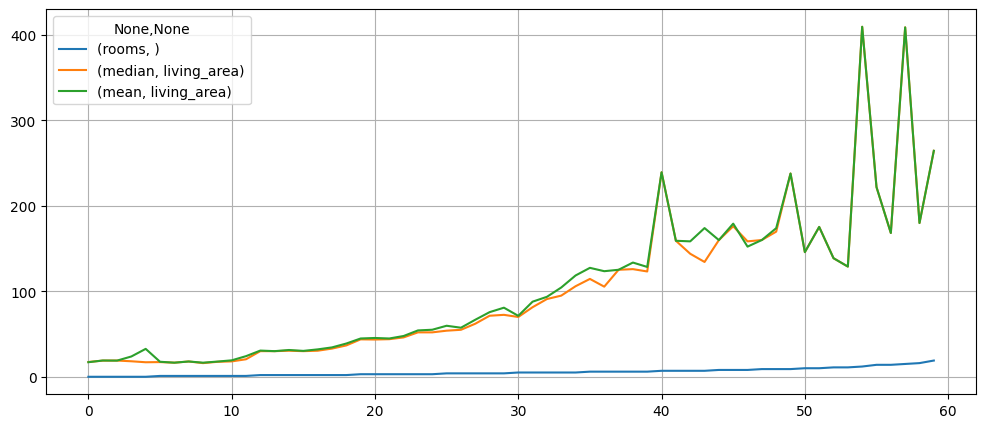

In [77]:
# проверим гипотезу о зависимости жилой площади от количества комнат  и месторасположения квартир относительно центра СПб
living_area_median = data.pivot_table(index=['rooms','category_center'], values='living_area', aggfunc=['median', 'mean'])
living_area_median.columns = ['median', 'mean']
display(living_area_median)

living_area_median = data.pivot_table(index=['rooms','category_center'], values='living_area', aggfunc=['median', 'mean'])\
.reset_index().plot(grid=True, figsize=(12, 5))

In [82]:
# заменим пропуски значений в столбце living_area' на медиану в зависимости от количества комнат и месторасположения 
data['living_area'] = data['living_area'].fillna(data.groupby(['rooms', 'category_center'])['living_area'].transform('median'))

In [83]:
# выводим количество пустых значений после замены
print('not_spb:', data.loc[not_spb_filter, 'living_area'].isna().sum())
print('spb:', data.loc[~not_spb_filter, 'living_area'].isna().sum())

not_spb: 1
spb: 0


**Столбец 'kitchen_area'**

In [84]:
#определим количество пропусков в столбце 'kitchen_area'
data['kitchen_area'].isna().sum()

2254

In [85]:
#выведем информацию о статистических характеристиках столбца 'kitchen_area'
data['kitchen_area'].describe()

count    21366.000000
mean        10.565722
std          5.902024
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [86]:
data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

Заменим пустые значения в столбце 'kitchen_area' расчетным путём. Определим разницу между общей площадью квартиры и жилой площадью (для квартир, которые имеют показатель - площадь кухни), затем найдём коэффциент как отношение площади кухни к нежилой площади в зависимости от количества комнат в квартире и удалённости от центра СПб. Получившийся коэффициент применим к показателю нежилой площади в зависимости от количества комнат в квартире.

In [87]:
#много незаполненных значений в столбцах 'living_area', 'kitchen_area', которые нужны в расчетах. Заменяю пропуски на нули.
data['kitchen_area'] = data['kitchen_area'].fillna(0)

In [88]:
# считаю нежилую прощадь
data['noliving_area'] = data['total_area'] - data['living_area']

#считаю и вывожу коэффициент
good_kitchen = data[data['kitchen_area'] > 0]
good_kitchen = good_kitchen.groupby(['rooms','category_center'])[['kitchen_area', 'noliving_area']].sum().reset_index()
good_kitchen['kitchen_ratio'] = good_kitchen['kitchen_area'] / good_kitchen['noliving_area']
display(good_kitchen.head(15))

#объединяю два набора данных по ключу 'rooms', вывожу на экран
data = data.join(good_kitchen['kitchen_ratio'], on='rooms', how='left')
display(data[['total_area', 'living_area', 'noliving_area', 'kitchen_area', 'kitchen_ratio']].head(15))

#добавляю новое поле 'kitchen_area_ratio'
data['kitchen_area_ratio'] = 0

#для всех значений, где площадь кухни равна 0, умножаю нежилаю площадь на коэффициент, сохраняю столбец
data.loc[data['kitchen_area'] == 0, 'kitchen_area_ratio'] = round((data['noliving_area'] * data['kitchen_ratio']), 2)

# финальная площадь как сумма исходного поля и нового kitchen_area_ratio. 
# Это допустимо, так как выше считали только для пропусков в площади кухни, 
# соответственно, где площадь была заполнена, там в новом поле 0.
data['kitchen_area_final'] = data['kitchen_area'] + data['kitchen_area_ratio']
display(data.loc[data['kitchen_area'] == 0, ['total_area', 'living_area', 'noliving_area', 'kitchen_area'
              , 'kitchen_ratio', 'kitchen_area_ratio', 'kitchen_area_final']].head(10))

rooms                            category_center  kitchen_area  \
0       1                                         ЛО      25696.52   
1       1        Район СПБ в радиусе 27 км от центра          7.00   
2       1  Районы СПБ в радиусе 10 - 27 км от центра      32845.64   
3       1    Районы СПБ в радиусе 28-30 км от центра         36.00   
4       1   Районы СПБ в радиусе 8 - 10 км от центра       3605.02   
5       1     Центр СПБ в радиусе 2 - 8 км от центра       6132.67   
6       1      Центр СПБ в радиусе до 2 км от центра        295.90   
7       2                                         ЛО      22697.65   
8       2        Район СПБ в радиусе 27 км от центра         25.00   
9       2  Районы СПБ в радиусе 10 - 27 км от центра      30848.23   
10      2    Районы СПБ в радиусе 28-30 км от центра         32.80   
11      2   Районы СПБ в радиусе 8 - 10 км от центра       4132.06   
12      2     Центр СПБ в радиусе 2 - 8 км от центра      12605.48   
13      2      Центр СПБ в радиусе до 2 км от центра       2027.95   
14      3                                         ЛО      14784.87   

    noliving_area  kitchen_ratio  
0    53483.160000       0.480460  
1       15.500000       0.451613  
2    68693.410000       0.478148  
3       70.000000       0.514286  
4     7523.850000       0.479146  
5    12855.340000       0.477052  
6      620.100000       0.477181  
7    56027.639997       0.405115  
8       44.000000       0.568182  
9    75220.308496       0.410105  
10      80.900000       0.405439  
11   10224.639999       0.404128  
12   29142.790000       0.432542  
13    4492.170000       0.451441  
14   40416.709998       0.365811

total_area  living_area  noliving_area  kitchen_area  kitchen_ratio
0       108.00        51.00          57.00         25.00       0.514286
1        40.40        18.60          21.80         11.00       0.451613
2        56.00        34.30          21.70          8.30       0.478148
3       159.00        52.00         107.00          0.00       0.514286
4       100.00        32.00          68.00         41.00       0.478148
5        30.40        14.40          16.00          9.10       0.451613
6        37.30        10.60          26.70         14.40       0.451613
7        71.60        30.50          41.10         18.90       0.478148
8        33.16        15.43          17.73          8.81       0.451613
9        61.00        43.60          17.40          6.50       0.514286
10       39.60        20.30          19.30          8.50       0.451613
11       44.00        31.00          13.00          6.00       0.478148
12       54.00        30.00          24.00          9.00       0.478148
13       42.80        27.00          15.80          5.20       0.478148
14       36.00        17.00          19.00          8.00       0.451613

C:\Users\Наталья\AppData\Local\Temp\ipykernel_10492\701446177.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[55.03  7.05  7.55 ... 12.83  8.04 12.91]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['kitchen_area'] == 0, 'kitchen_area_ratio'] = round((data['noliving_area'] * data['kitchen_ratio']), 2)


total_area  living_area  noliving_area  kitchen_area  kitchen_ratio  \
3         159.0         52.0          107.0           0.0       0.514286   
30         32.8         17.2           15.6           0.0       0.451613   
37         45.8         30.0           15.8           0.0       0.478148   
44         40.0         17.9           22.1           0.0       0.451613   
59         46.5         17.9           28.6           0.0       0.451613   
60         35.0         17.2           17.8           0.0       0.451613   
81         80.5         43.8           36.7           0.0       0.514286   
132        31.0         17.2           13.8           0.0       0.451613   
143        27.0         15.5           11.5           0.0       0.480460   
154       317.0        183.0          134.0           0.0       0.479146   

     kitchen_area_ratio  kitchen_area_final  
3                 55.03               55.03  
30                 7.05                7.05  
37                 7.55                7.55  
44                 9.98                9.98  
59                12.92               12.92  
60                 8.04                8.04  
81                18.87               18.87  
132                6.23                6.23  
143                5.53                5.53  
154               64.21               64.21

In [89]:
# Заменяю значения в столбце 'kitchen_area' значениями из 'kitchen_area_final'
data['kitchen_area'] = data['kitchen_area_final']

In [90]:
# проверим квартиры где число комнат 0 (в столбце rooms=0)
test_rooms = data.loc[data['rooms'] < 1].index

In [91]:
# проверим студии:
data.loc[test_rooms,['rooms','category_center','total_area', 'living_area','kitchen_area','noliving_area','studio', 'open_plan']].head(15)

rooms                            category_center  total_area  \
143       0                                         ЛО       27.00   
348       0                                         ЛО       25.00   
439       0  Районы СПБ в радиусе 10 - 27 км от центра       27.11   
507       0                                         ЛО       34.40   
607       0                                         ЛО       25.00   
696       0                                         ЛО       24.10   
715       0                                         ЛО       17.00   
778       0                                         ЛО       26.10   
837       0                                         ЛО       35.00   
944       0                                         ЛО       23.00   
1170      0  Районы СПБ в радиусе 10 - 27 км от центра       29.00   
1171      0     Центр СПБ в радиусе 2 - 8 км от центра       32.00   
1217      0  Районы СПБ в радиусе 10 - 27 км от центра       27.00   
1257      0                                         ЛО       27.00   
1274      0  Районы СПБ в радиусе 10 - 27 км от центра       26.00   

      living_area  kitchen_area  noliving_area  studio  open_plan  
143         15.50          5.53          11.50    True      False  
348         17.00          3.84           8.00   False       True  
439         24.75          1.13           2.36    True      False  
507         24.30          4.85          10.10   False       True  
607         17.30          3.70           7.70    True      False  
696         17.50          3.17           6.60    True      False  
715         12.00          2.40           5.00    True      False  
778         17.30          4.23           8.80   False       True  
837         15.00          9.61          20.00   False       True  
944         18.00          2.40           5.00   False       True  
1170        17.00          5.77          12.00    True      False  
1171        18.00          6.73          14.00    True      False  
1217        20.00          3.36           7.00    True      False  
1257        16.00          5.29          11.00    True      False  
1274        17.38          4.14           8.62    True      False

In [92]:
display(data.loc[data['rooms'] == 0, ['total_area', 'living_area', 'kitchen_area']].head(10))

total_area  living_area  kitchen_area
143       27.00        15.50          5.53
348       25.00        17.00          3.84
439       27.11        24.75          1.13
507       34.40        24.30          4.85
607       25.00        17.30          3.70
696       24.10        17.50          3.17
715       17.00        12.00          2.40
778       26.10        17.30          4.23
837       35.00        15.00          9.61
944       23.00        18.00          2.40

Проведём проверку логических ошибок в данных:

In [93]:
#логическая проверка: жилая площадь не может быть больше общей
print('количество логических ошибок:', data.query('living_area > total_area')['living_area'].count())

#логическая проверка: (площадь кухни + жилая площадь) > общей площади
print('количество логических ошибок:', data.query('(kitchen_area +living_area) > total_area')['total_area'].count())

количество логических ошибок: 27
количество логических ошибок: 99


In [94]:
#логическая проверка: жилая площадь не может быть равна общей
print('количество логических ошибок:', data.query('living_area == total_area')['living_area'].count())

количество логических ошибок: 4


In [95]:
# удалим аномальные значения
data = data[(data['living_area'] <= data['total_area'])]
data = data[((data['kitchen_area'] + data['living_area']) < data['total_area'])]

In [96]:
data['kitchen_area'].describe()

count    23446.000000
mean        10.674006
std          6.884654
min          0.130000
25%          7.000000
50%          9.100000
75%         12.000000
max        215.010000
Name: kitchen_area, dtype: float64

In [97]:
data.describe()

total_images    last_price    total_area  \
count  23446.000000  2.344600e+04  23446.000000   
mean       9.862450  6.538684e+06     60.345187   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.406500e+06     40.000000   
50%        9.000000  4.650000e+06     52.000000   
75%       14.000000  6.778750e+06     69.800000   
max       50.000000  7.630000e+08    900.000000   
std        5.677061  1.092424e+07     35.615078   

                first_day_exposition         rooms  ceiling_height  \
count                          23446  23446.000000    23446.000000   
mean   2017-11-09 04:15:48.289686784      2.069777        2.706831   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-13 06:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.750000   
max              2019-05-03 00:00:00     19.000000        8.300000   
std                              NaN      1.076035        0.248686   

       floors_total   living_area         floor  kitchen_area  ...  \
count       23362.0  23446.000000  23446.000000  23446.000000  ...   
mean      10.674172     34.243530      5.891623     10.674006  ...   
min             1.0      2.000000      1.000000      0.130000  ...   
25%             5.0     18.400000      2.000000      7.000000  ...   
50%             9.0     30.000000      4.000000      9.100000  ...   
75%            16.0     42.600000      8.000000     12.000000  ...   
max            60.0    409.700000     33.000000    215.010000  ...   
std        6.587641     21.645964      4.879934      6.884654  ...   

       parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
count            23446.0    8009.000000            23446.0    9033.000000   
mean            0.469846     491.209639           0.591785     517.986937   
min                  0.0       1.000000                0.0      13.000000   
25%                  0.0     288.000000                0.0     293.000000   
50%                  0.0     455.000000                0.0     502.000000   
75%                  1.0     612.000000                1.0     730.000000   
max                  3.0    3190.000000                3.0    1344.000000   
std             0.748758     342.554052           0.883825     277.728090   

       days_exposition  city_centers_nearest_km  noliving_area  kitchen_ratio  \
count          20303.0             18024.000000   23446.000000   23446.000000   
mean        181.119588                14.201897      26.101657       0.477872   
min                1.0                 0.000000       0.270000       0.320809   
25%               45.0                 9.000000      17.000000       0.451613   
50%               96.0                13.000000      22.100000       0.478148   
75%              232.0                16.000000      29.400000       0.480460   
max             1580.0                66.000000     490.300000       0.568182   
std         220.017518                 8.623115      18.100899       0.024117   

       kitchen_area_ratio  kitchen_area_final  
count        23446.000000        23446.000000  
mean             1.134057           10.674006  
min              0.000000            0.130000  
25%              0.000000            7.000000  
50%              0.000000            9.100000  
75%              0.000000           12.000000  
max            215.010000          215.010000  
std              5.317738            6.884654  

[8 rows x 23 columns]

In [98]:
# удалим лишние столбцы 'noliving_area', 'kitchen_ratio','kitchen_area_ratio', 'kitchen_area_final'
data.drop(['noliving_area', 'kitchen_ratio','kitchen_area_ratio', 'kitchen_area_final'], axis= 1 , inplace= True )

In [99]:
#вывод сведений об обработанном датафрейме
data.describe()

total_images    last_price    total_area  \
count  23446.000000  2.344600e+04  23446.000000   
mean       9.862450  6.538684e+06     60.345187   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.406500e+06     40.000000   
50%        9.000000  4.650000e+06     52.000000   
75%       14.000000  6.778750e+06     69.800000   
max       50.000000  7.630000e+08    900.000000   
std        5.677061  1.092424e+07     35.615078   

                first_day_exposition         rooms  ceiling_height  \
count                          23446  23446.000000    23446.000000   
mean   2017-11-09 04:15:48.289686784      2.069777        2.706831   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-13 06:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.750000   
max              2019-05-03 00:00:00     19.000000        8.300000   
std                              NaN      1.076035        0.248686   

       floors_total   living_area         floor  kitchen_area   balcony  \
count       23362.0  23446.000000  23446.000000  23446.000000   23446.0   
mean      10.674172     34.243530      5.891623     10.674006  0.590676   
min             1.0      2.000000      1.000000      0.130000       0.0   
25%             5.0     18.400000      2.000000      7.000000       0.0   
50%             9.0     30.000000      4.000000      9.100000       0.0   
75%            16.0     42.600000      8.000000     12.000000       1.0   
max            60.0    409.700000     33.000000    215.010000       5.0   
std        6.587641     21.645964      4.879934      6.884654  0.958172   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      18001.000000          18024.000000            23446.0   
mean       28817.176879          14208.238571           0.469846   
min            0.000000            181.000000                0.0   
25%        18585.000000           9251.250000                0.0   
50%        26766.000000          13107.000000                0.0   
75%        37310.000000          16296.500000                1.0   
max        84869.000000          65968.000000                3.0   
std        12638.324768           8615.184665           0.748758   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
count    8009.000000            23446.0    9033.000000          20303.0   
mean      491.209639           0.591785     517.986937       181.119588   
min         1.000000                0.0      13.000000              1.0   
25%       288.000000                0.0     293.000000             45.0   
50%       455.000000                0.0     502.000000             96.0   
75%       612.000000                1.0     730.000000            232.0   
max      3190.000000                3.0    1344.000000           1580.0   
std       342.554052           0.883825     277.728090       220.017518   

       city_centers_nearest_km  
count             18024.000000  
mean                 14.201897  
min                   0.000000  
25%                   9.000000  
50%                  13.000000  
75%                  16.000000  
max                  66.000000  
std                   8.623115

**2.9 Изучим столбец 'last_price'**

In [100]:
#отсортируем и выведем уникальные значения в столбце 'last_price'
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [101]:
#выведем информацию о статистических характеристиках столбца
data['last_price'].describe()

count    2.344600e+04
mean     6.538684e+06
std      1.092424e+07
min      1.219000e+04
25%      3.406500e+06
50%      4.650000e+06
75%      6.778750e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [102]:
data.query('1000000.0 < last_price < 50000000.0').describe()

total_images    last_price    total_area  \
count  23068.000000  2.306800e+04  23068.000000   
mean       9.859329  6.031529e+06     59.364351   
min        0.000000  1.010000e+06     12.000000   
25%        6.000000  3.450000e+06     40.000000   
50%        9.000000  4.650000e+06     52.000000   
75%       14.000000  6.750000e+06     69.325000   
max       50.000000  4.996890e+07    494.100000   
std        5.672728  4.893042e+06     30.895810   

                first_day_exposition         rooms  ceiling_height  \
count                          23068  23068.000000    23068.000000   
mean   2017-11-09 12:25:58.106467584      2.058739        2.704155   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-14 00:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.750000   
max              2019-05-03 00:00:00     19.000000        8.300000   
std                              NaN      1.054039        0.241192   

       floors_total   living_area         floor  kitchen_area   balcony  \
count       22984.0  23068.000000  23068.000000  23068.000000   23068.0   
mean      10.762574     33.727786      5.927735     10.535727  0.594763   
min             1.0      2.000000      1.000000      0.130000       0.0   
25%             5.0     18.400000      2.000000      7.000000       0.0   
50%             9.0     30.000000      4.000000      9.200000       0.0   
75%            16.0     42.400000      8.000000     12.000000       1.0   
max            60.0    312.500000     33.000000    215.010000       5.0   
std        6.593688     19.432283      4.897575      6.073876  0.961338   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      17866.000000          17887.000000            23068.0   
mean       28832.817419          14281.998043           0.468138   
min            0.000000            181.000000                0.0   
25%        18539.000000           9415.500000                0.0   
50%        26791.000000          13149.000000                0.0   
75%        37407.000000          16336.000000                1.0   
max        84869.000000          65968.000000                3.0   
std        12678.597734           8604.282601           0.743626   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
count    7903.000000            23068.0    8917.000000          20006.0   
mean      492.648868           0.590558     520.080408       180.561382   
min         1.000000                0.0      13.000000              1.0   
25%       288.000000                0.0     297.000000             45.0   
50%       456.000000                0.0     503.000000             95.0   
75%       613.000000                1.0     733.000000            231.0   
max      3190.000000                3.0    1344.000000           1580.0   
std       342.619096           0.879673     277.958746       219.799486   

       city_centers_nearest_km  
count             17887.000000  
mean                 14.275675  
min                   0.000000  
25%                   9.000000  
50%                  13.000000  
75%                  16.000000  
max                  66.000000  
std                   8.612139

In [103]:
#убедимся, что медиана и среднее практически не изменили значений
data['last_price'].describe()

count    2.344600e+04
mean     6.538684e+06
std      1.092424e+07
min      1.219000e+04
25%      3.406500e+06
50%      4.650000e+06
75%      6.778750e+06
max      7.630000e+08
Name: last_price, dtype: float64

**2.10 Изучим столбец 'rooms'**

В столбце 'rooms' нет пропущенных значений.

In [104]:
#отсортируем и выведем уникальные значения в столбце 'rooms'
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

In [105]:
#выведем информацию о статистических характеристиках столбца 'rooms'
data['rooms'].describe()

count    23446.000000
mean         2.069777
std          1.076035
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В стобце 'rooms' есть значения от 0 до 19. Квартира с 0 комнат может быть студией  или свободной планировкой. 19 комнат может быть, например, в доме. Поэтому оставим этот столбец без изменений.

**2.11 Изучим столбец 'days_exposition'**

In [106]:
#отсортируем и выведем уникальные значения в столбце 'days_exposition'.
data['days_exposition'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
 ...
 1484, 1485, 1489, 1497, 1512, 1513, 1553, 1572, 1580, <NA>]
Length: 1142, dtype: Int64

In [107]:
#выведем информацию о статистических характеристиках столбца 'days_exposition'
data['days_exposition'].describe()

count       20303.0
mean     181.119588
std      220.017518
min             1.0
25%            45.0
50%            96.0
75%           232.0
max          1580.0
Name: days_exposition, dtype: Float64

In [108]:
#выведем распределение пропусков в столбце 'days_exposition' по годам. 
#для этого сначал посмотрим, какие годы входят в столбец 'first_day_exposition'.
data['first_day_exposition'].sort_values().unique()

<DatetimeArray>
['2014-11-27 00:00:00', '2014-11-29 00:00:00', '2014-12-04 00:00:00',
 '2014-12-05 00:00:00', '2014-12-08 00:00:00', '2014-12-09 00:00:00',
 '2014-12-10 00:00:00', '2014-12-11 00:00:00', '2014-12-12 00:00:00',
 '2014-12-13 00:00:00',
 ...
 '2019-04-24 00:00:00', '2019-04-25 00:00:00', '2019-04-26 00:00:00',
 '2019-04-27 00:00:00', '2019-04-28 00:00:00', '2019-04-29 00:00:00',
 '2019-04-30 00:00:00', '2019-05-01 00:00:00', '2019-05-02 00:00:00',
 '2019-05-03 00:00:00']
Length: 1491, dtype: datetime64[ns]

В датафрейме собраны занные с 2014 по 2019 год.

In [109]:
#посмотрим распределение пропусков в столбце 'days_exposition' за 2014-2019 годы.
#введём новый столбец 'first_day_exposition_year', чтобы не перезаписывать данные в столбце 'first_day_exposition':

data['first_day_exposition_year'] = data['first_day_exposition'].dt.year
data.groupby('first_day_exposition_year')['days_exposition'].apply(lambda _data: _data.isna().sum())

first_day_exposition_year
2014      18
2015      70
2016      67
2017     271
2018     946
2019    1771
Name: days_exposition, dtype: int64

В столбце 'days_exposition' есть значения от 1 до 1580. Оставим столбец без изменений, так как квартиры могут продаваться в течение разного времени. Большая часть пропусков в столбце 'days_exposition' приходится на 2018 и 2019 год. А значит, удалять пропуски нельзя, так как при удалении данные получат сильное искажение по двум последним годам.

**2.12 'floors_total''**

In [110]:
#определим количество пропусков в столбце 'loors_total'
data['floors_total'].isna().sum()

84

In [111]:
#отсортируем и выведем уникальные значения в столбце 'floors_total'.
data['floors_total'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,   12,   13,
   14,   15,   16,   17,   18,   19,   20,   21,   22,   23,   24,   25,   26,
   27,   28,   29,   33,   34,   35,   36,   37,   52,   60, <NA>]
Length: 37, dtype: Int64

In [112]:
# в столбце 'floors_total' 84 пропущеных значений. 
# Удалим эти пропуски, так как восстановить данные в них будет сложно
data = data.dropna(subset=['floors_total']).reset_index(drop=True)


В результате предобработки данных были удалены строки, в которых отсутствует информация о населённом пункте (столбец 'locality_name'), так как без этих данных строки не имеют прикладного значения. В отношении других столбцов ситуация сложнее - есть множество строк в датафрейме, в которых имеются пропуски только в одной ячейке из всех остальных.  

Также, в результате предобработки данных, было принято решение заполнить пропуски в столбцах, в которых это возможно.
Пропуски в столбцах:
 - parks_around3000 — число парков в радиусе 3 км;
 - parks_nearest — расстояние до ближайшего парка (м);
 - ponds_around3000 — число водоёмов в радиусе 3 км;
 - ponds_nearest — расстояние до ближайшего водоёма (м);

не обрабатывались, так как в целя исследования отсутствует необходимость исследования данных в этих столбцах.
 

In [113]:
#выведем основную информацию об изменившимся датафрейме с помощью метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23362 entries, 0 to 23361
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               23362 non-null  int64         
 1   last_price                 23362 non-null  float64       
 2   total_area                 23362 non-null  float64       
 3   first_day_exposition       23362 non-null  datetime64[ns]
 4   rooms                      23362 non-null  int64         
 5   ceiling_height             23362 non-null  float64       
 6   floors_total               23362 non-null  Int64         
 7   living_area                23362 non-null  float64       
 8   floor                      23362 non-null  int64         
 9   is_apartment               23362 non-null  bool          
 10  studio                     23362 non-null  bool          
 11  open_plan                  23362 non-null  bool          
 12  kitc

In [114]:
print(len(data))

23362


In [115]:
print('Доля удаленных строк датафрейма, %:', round((1 - 23332/23699)*100,2))

Доля удаленных строк датафрейма, %: 1.55


### 3. Посчитаем и добавим в таблицу новые столбцы

In [116]:
#выведем 15 первых строк предобработанных данных.
data.head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00           2019-03-07      3   
1              7   3350000.0       40.40           2018-12-04      1   
2             10   5196000.0       56.00           2015-08-20      2   
3              0  64900000.0      159.00           2015-07-24      3   
4              2  10000000.0      100.00           2018-06-19      2   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
10             5   5050000.0       39.60           2017-11-16      1   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
13            20   3550000.0       42.80           2017-07-01      2   
14             1   4400000.0       36.00           2016-06-23      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70            16        51.00      8         False  ...   
1             2.60            11        18.60      1         False  ...   
2             2.60             5        34.30      4         False  ...   
3             3.00            14        52.00      9         False  ...   
4             3.03            14        32.00     13         False  ...   
5             2.60            12        14.40      5         False  ...   
6             2.60            26        10.60      6         False  ...   
7             2.60            24        30.50     22         False  ...   
8             2.60            27        15.43     26         False  ...   
9             2.50             9        43.60      7         False  ...   
10            2.67            12        20.30      3         False  ...   
11            2.60             5        31.00      4         False  ...   
12            2.60             5        30.00      5         False  ...   
13            2.56             5        27.00      5         False  ...   
14            2.60             6        17.00      1         False  ...   

    airports_nearest  city_centers_nearest  parks_around_3000  parks_nearest  \
0            18863.0               16028.0                  1          482.0   
1            12817.0               18603.0                  0            NaN   
2            21741.0               13933.0                  1           90.0   
3            28098.0                6800.0                  2           84.0   
4            31856.0                8098.0                  2          112.0   
5                NaN                   NaN                  0            NaN   
6            52996.0               19143.0                  0            NaN   
7            23982.0               11634.0                  0            NaN   
8                NaN                   NaN                  0            NaN   
9            50898.0               15008.0                  0            NaN   
10           38357.0               13878.0                  1          310.0   
11           48252.0               51677.0                  0            NaN   
12               NaN                   NaN                  0            NaN   
13           37868.0               33058.0                  1          294.0   
14           20782.0               30759.0                  0            NaN   

   ponds_around_3000  ponds_nearest  days_exposition  city_centers_nearest_km  \
0                  2          755.0             <NA>                     16.0   
1                  0            NaN               81                     19.0   
2                  2          574.0              558                     14.0   
3                  3          234.0          

Добавим в таблицу новые столбцы.

In [117]:
#добавим столбец цена одного квадратного метра
data['one_meter_price'] = data['last_price'] / data['total_area']

In [118]:
#добавим столбец день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [119]:
#добавим столбец месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [120]:
#добавим столбец год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [121]:
#добавим столбец тип этажа квартиры (значения — «первый», «последний», «другой»):
def typefloor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'нет данных'
data['type_of_floor'] = data.apply(typefloor, axis=1)

In [122]:
#выведем обновлённый датафрейм
data.head(15)

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00           2019-03-07      3   
1              7   3350000.0       40.40           2018-12-04      1   
2             10   5196000.0       56.00           2015-08-20      2   
3              0  64900000.0      159.00           2015-07-24      3   
4              2  10000000.0      100.00           2018-06-19      2   
5             10   2890000.0       30.40           2018-09-10      1   
6              6   3700000.0       37.30           2017-11-02      1   
7              5   7915000.0       71.60           2019-04-18      2   
8             20   2900000.0       33.16           2018-05-23      1   
9             18   5400000.0       61.00           2017-02-26      3   
10             5   5050000.0       39.60           2017-11-16      1   
11             9   3300000.0       44.00           2018-08-27      2   
12            10   3890000.0       54.00           2016-06-30      2   
13            20   3550000.0       42.80           2017-07-01      2   
14             1   4400000.0       36.00           2016-06-23      1   

    ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0             2.70            16        51.00      8         False  ...   
1             2.60            11        18.60      1         False  ...   
2             2.60             5        34.30      4         False  ...   
3             3.00            14        52.00      9         False  ...   
4             3.03            14        32.00     13         False  ...   
5             2.60            12        14.40      5         False  ...   
6             2.60            26        10.60      6         False  ...   
7             2.60            24        30.50     22         False  ...   
8             2.60            27        15.43     26         False  ...   
9             2.50             9        43.60      7         False  ...   
10            2.67            12        20.30      3         False  ...   
11            2.60             5        31.00      4         False  ...   
12            2.60             5        30.00      5         False  ...   
13            2.56             5        27.00      5         False  ...   
14            2.60             6        17.00      1         False  ...   

    ponds_nearest  days_exposition  city_centers_nearest_km  \
0           755.0             <NA>                     16.0   
1             NaN               81                     19.0   
2           574.0              558                     14.0   
3           234.0              424                      7.0   
4            48.0              121                      8.0   
5             NaN               55                      NaN   
6             NaN              155                     19.0   
7             NaN             <NA>                     12.0   
8             NaN              189                      NaN   
9             NaN              289                     15.0   
10          553.0              137                     14.0   
11            NaN                7                     52.0   
12            NaN               90                      NaN   
13          298.0              366                     33.0   
14           96.0              203                     31.0   

                              category_center first_day_exposition_year  \
0   Районы СПБ в радиусе 10 - 27 км от центра                      2019   
1                                          ЛО                      2018   
2   Районы СПБ в радиусе 10 - 27 км от центра                      2015   
3      Центр СПБ в радиусе 2 - 8 км от центра                      2015   
4      Центр СПБ в радиусе 2 - 8 км от центра                      2018   
5                                          ЛО                      2018   
6                                          ЛО                      2017   
7   Районы СПБ в радиусе 10 - 27 км от це

### 4. Проведём исследовательский анализ данных

Предобработка данных показала, что в данных есть выбросы. Для формирования усреденных выводов необходимо отбросить выбросы. 

Для решения проблемы выбросов в данных выделим интервал, в котором будут располагаться "не-выбросы". И дальше — масштабировать по этому интервалу. Для автоматического определения выбросов применим межквартильный метод. Его суть заключается в том, что выбросами будут "назначены" данные, которые более чем в 1,5 межквартильных диапазонах (IQR) ниже первого квартиля или выше третьего квартиля.

In [123]:
# рассмотрим сведения об имеющемся датафрейме
data.describe()

total_images    last_price    total_area  \
count  23362.000000  2.336200e+04  23362.000000   
mean       9.878478  6.537525e+06     60.337964   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.406500e+06     40.000000   
50%        9.000000  4.648500e+06     52.000000   
75%       14.000000  6.768348e+06     69.732500   
max       50.000000  7.630000e+08    900.000000   
std        5.675876  1.093873e+07     35.609669   

                first_day_exposition         rooms  ceiling_height  \
count                          23362  23362.000000    23362.000000   
mean   2017-11-09 13:41:31.122335488      2.070285        2.706997   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-15 00:00:00      1.000000        2.600000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.750000   
max              2019-05-03 00:00:00     19.000000        8.300000   
std                              NaN      1.075996        0.248999   

       floors_total   living_area         floor  kitchen_area  ...  \
count       23362.0  23362.000000  23362.000000  23362.000000  ...   
mean      10.674172     34.254054      5.876380     10.666057  ...   
min             1.0      2.000000      1.000000      0.130000  ...   
25%             5.0     18.400000      2.000000      7.000000  ...   
50%             9.0     30.000000      4.000000      9.100000  ...   
75%            16.0     42.600000      8.000000     12.000000  ...   
max            60.0    409.700000     33.000000    215.010000  ...   
std        6.587641     21.658213      4.867875      6.883046  ...   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
count    7975.000000            23362.0    8984.000000          20227.0   
mean      490.959248           0.591302     518.217498       181.109062   
min         1.000000                0.0      13.000000              1.0   
25%       288.000000                0.0     293.000000             45.0   
50%       455.000000                0.0     503.000000             96.0   
75%       612.000000                1.0     730.000000            232.0   
max      3190.000000                3.0    1344.000000           1580.0   
std       341.566119           0.884246     277.896396       219.972981   

       city_centers_nearest_km  first_day_exposition_year  one_meter_price  \
count             17949.000000               23362.000000     2.336200e+04   
mean                 14.196835                2017.368804     9.930172e+04   
min                   0.000000                2014.000000     1.118349e+02   
25%                   9.000000                2017.000000     7.656250e+04   
50%                  13.000000                2017.000000     9.493671e+04   
75%                  16.000000                2018.000000     1.140625e+05   
max                  66.000000                2019.000000     1.907500e+06   
std                   8.629678                   1.037097     5.019701e+04   

       weekday_exposition  month_exposition  year_exposition  
count        23362.000000      23362.000000     23362.000000  
mean             2.566133          6.401849      2017.368804  
min              0.000000          1.000000      2014.000000  
25%              1.000000          3.000000      2017.000000  
50%              3.000000          6.000000      2017.000000  
75%              4.000000         10.000000      2018.000000  
max              6.000000         12.000000      2019.000000  
std              1.786330          3.493201         1.037097  

[8 rows x 24 columns]

In [124]:
# функция для подсчёта границ с учётом 1,5 размаха
def whiskers_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = whiskers_range(data, col)

In [125]:
# рассмотрим обновленные сведения
data.describe()

total_images    last_price    total_area  \
count  23362.000000  2.133800e+04  22139.000000   
mean       9.878478  4.837275e+06     54.363439   
min        0.000000  1.219000e+04     12.000000   
25%        6.000000  3.300000e+06     39.400000   
50%        9.000000  4.400000e+06     50.100000   
75%       14.000000  5.999000e+06     65.515000   
max       50.000000  1.180967e+07    114.300000   
std        5.675876  2.210852e+06     19.326355   

                first_day_exposition         rooms  ceiling_height  \
count                          23362  23174.000000    19343.000000   
mean   2017-11-09 13:41:31.122335488      2.030767        2.616324   
min              2014-11-27 00:00:00      0.000000        2.500000   
25%              2017-05-15 00:00:00      1.000000        2.560000   
50%              2017-12-12 00:00:00      2.000000        2.600000   
75%              2018-08-25 00:00:00      3.000000        2.650000   
max              2019-05-03 00:00:00      5.000000        2.970000   
std                              NaN      0.972967        0.090512   

       floors_total   living_area         floor  kitchen_area  ...  \
count       23362.0  22597.000000  23362.000000  21964.000000  ...   
mean      10.674172     31.537007      5.876380      9.443134  ...   
min             1.0      2.000000      1.000000      0.130000  ...   
25%             5.0     18.100000      2.000000      7.000000  ...   
50%             9.0     30.000000      4.000000      9.000000  ...   
75%            16.0     41.000000      8.000000     11.110000  ...   
max            60.0     78.600000     33.000000     19.450000  ...   
std        6.587641     13.957227      4.867875      3.240582  ...   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
count    7975.000000            23362.0    8984.000000          18581.0   
mean      490.959248           0.591302     518.217498       128.885636   
min         1.000000                0.0      13.000000              1.0   
25%       288.000000                0.0     293.000000             41.0   
50%       455.000000                0.0     503.000000             85.0   
75%       612.000000                1.0     730.000000            183.0   
max      3190.000000                3.0    1344.000000            512.0   
std       341.566119           0.884246     277.896396       121.582913   

       city_centers_nearest_km  first_day_exposition_year  one_meter_price  \
count             17949.000000               23362.000000     2.336200e+04   
mean                 14.196835                2017.368804     9.930172e+04   
min                   0.000000                2014.000000     1.118349e+02   
25%                   9.000000                2017.000000     7.656250e+04   
50%                  13.000000                2017.000000     9.493671e+04   
75%                  16.000000                2018.000000     1.140625e+05   
max                  66.000000                2019.000000     1.907500e+06   
std                   8.629678                   1.037097     5.019701e+04   

       weekday_exposition  month_exposition  year_exposition  
count        23362.000000      23362.000000     23362.000000  
mean             2.566133          6.401849      2017.368804  
min              0.000000          1.000000      2014.000000  
25%              1.000000          3.000000      2017.000000  
50%              3.000000          6.000000      2017.000000  
75%              4.000000         10.000000      2018.000000  
max              6.000000         12.000000      2019.000000  
std              1.786330          3.493201         1.037097  

[8 rows x 24 columns]

In [126]:
print('Доля удаленных строк датафрейма, %:', round((1 - 23332/23699)*100,2))

Доля удаленных строк датафрейма, %: 1.55


**Изучим следующие параметры объектов:**

**4.1 общая площадь:**

In [127]:
data['total_area'].describe()

count    22139.000000
mean        54.363439
std         19.326355
min         12.000000
25%         39.400000
50%         50.100000
75%         65.515000
max        114.300000
Name: total_area, dtype: float64

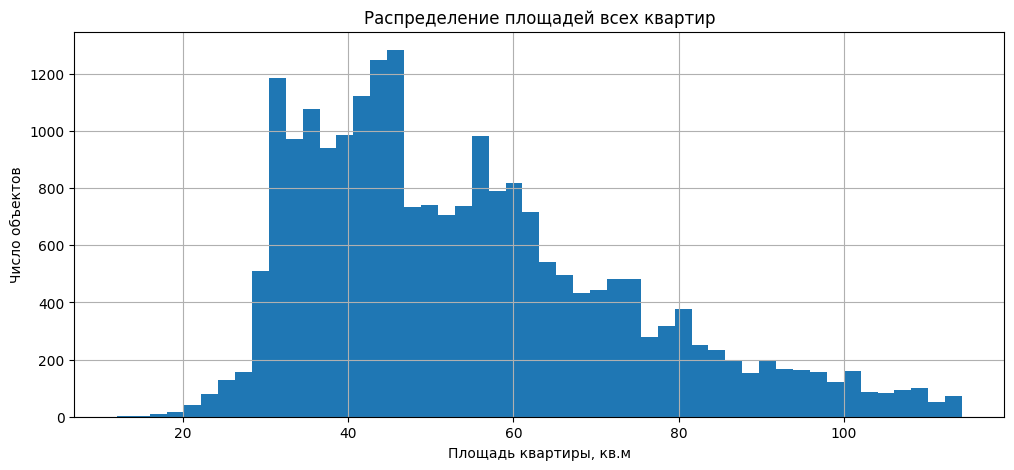

In [128]:
data['total_area'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение площадей всех квартир');
plt.xlabel("Площадь квартиры, кв.м");
plt.ylabel("Число объектов");

Среднее значение общей площади 54.35 м² немного выше медианы 50.10 м². В большинстве случаев общая площадь квартир составляет от 39,40 м² до 65,50 м².

**4.2 жилая площадь:**

In [129]:
data['living_area'].describe()

count    22597.000000
mean        31.537007
std         13.957227
min          2.000000
25%         18.100000
50%         30.000000
75%         41.000000
max         78.600000
Name: living_area, dtype: float64

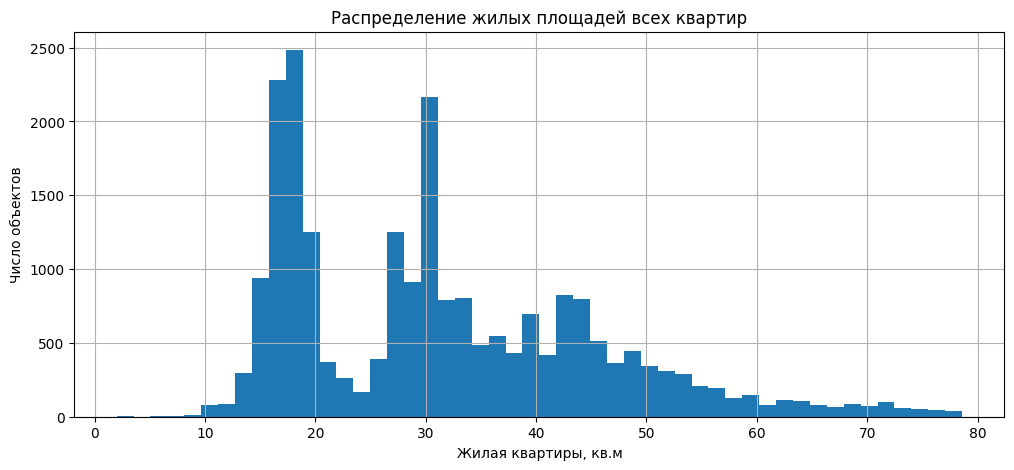

In [130]:
data['living_area'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение жилых площадей всех квартир');
plt.xlabel("Жилая квартиры, кв.м");
plt.ylabel("Число объектов");

Среднее значение жилой площади 31.53 м² немного выше медианы 30.00 м², что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев жилая площадь квартир составляет от 18.10 м² до 41.00 м².

**4.3 площадь кухни:**

In [131]:
data['kitchen_area'].describe()

count    21964.000000
mean         9.443134
std          3.240582
min          0.130000
25%          7.000000
50%          9.000000
75%         11.110000
max         19.450000
Name: kitchen_area, dtype: float64

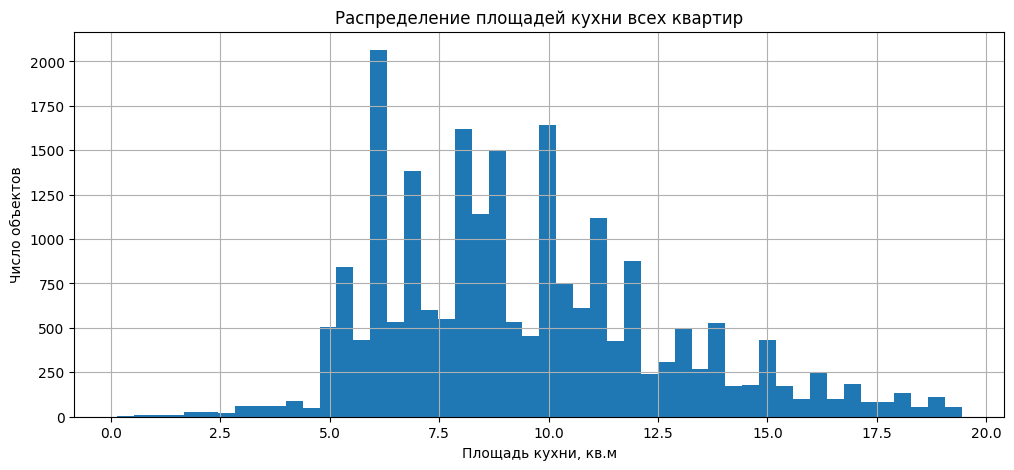

In [132]:
data['kitchen_area'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение площадей кухни всех квартир');
plt.xlabel("Площадь кухни, кв.м");
plt.ylabel("Число объектов");

Среднее значение площади кухни 9,44 м² немного выше медианы 9,00 м². В большинстве случаев площадь кухни составляет от 7,10 м² до 11,11 м².

**4.4 цена объекта:**

In [133]:
data['last_price'].describe()

count    2.133800e+04
mean     4.837275e+06
std      2.210852e+06
min      1.219000e+04
25%      3.300000e+06
50%      4.400000e+06
75%      5.999000e+06
max      1.180967e+07
Name: last_price, dtype: float64

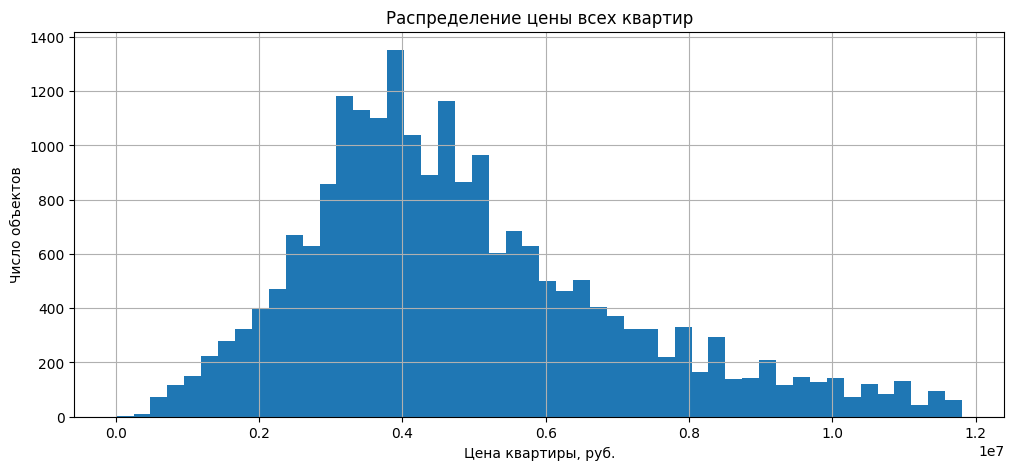

In [134]:
data['last_price'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение цены всех квартир');
plt.xlabel("Цена квартиры, руб.");
plt.ylabel("Число объектов");

Среднее значение цены квартиры  4,82 млн руб. выше медианы 4,4 млн руб. В большинстве случаев цена квартиры составляет от 3,30 млн руб. до 5,99 млн руб.

**4.5 количество комнат:**

In [135]:
data['rooms'].describe()

count    23174.000000
mean         2.030767
std          0.972967
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

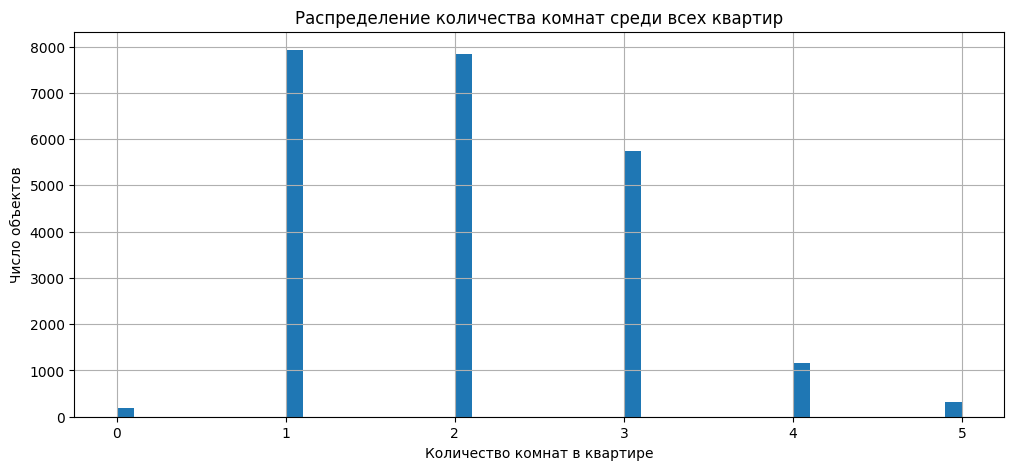

In [136]:
data['rooms'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение количества комнат среди всех квартир');
plt.xlabel("Количество комнат в квартире");
plt.ylabel("Число объектов");

Среднее значение количества комнат совпадает с медианой и равно 2. В большинстве случаев количество комнат в квартире составляет от 1 до 3.

**4.6 высота потолков:**

In [137]:
data['ceiling_height'].describe()

count    19343.000000
mean         2.616324
std          0.090512
min          2.500000
25%          2.560000
50%          2.600000
75%          2.650000
max          2.970000
Name: ceiling_height, dtype: float64

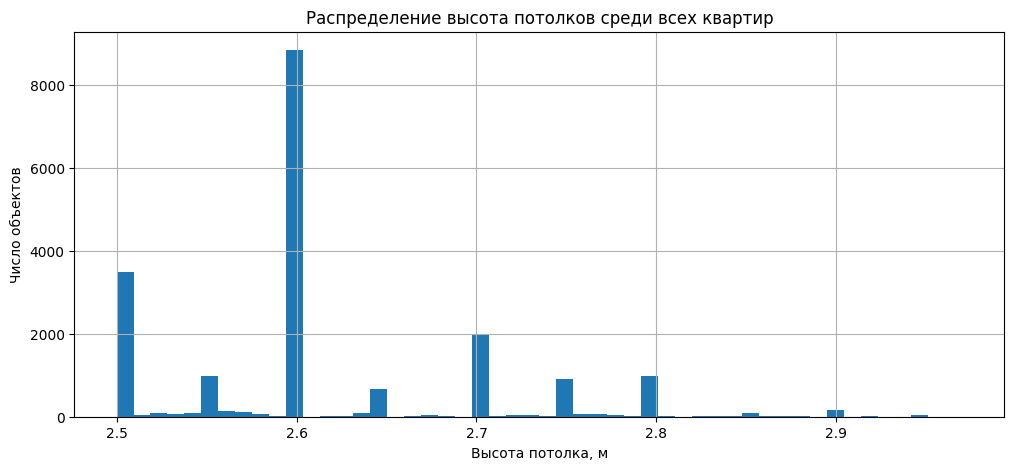

In [138]:
data['ceiling_height'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение высота потолков среди всех квартир');
plt.xlabel("Высота потолка, м");
plt.ylabel("Число объектов");

Среднее значение высоты потолков 2,61 м почти совпадает с медианой 2,60 м. В большинстве случаев высота потолков составляет от 2,56 м до 2,65 м.

**4.7 этаж квартиры:**

In [139]:
data['floor'].describe()

count    23362.000000
mean         5.876380
std          4.867875
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

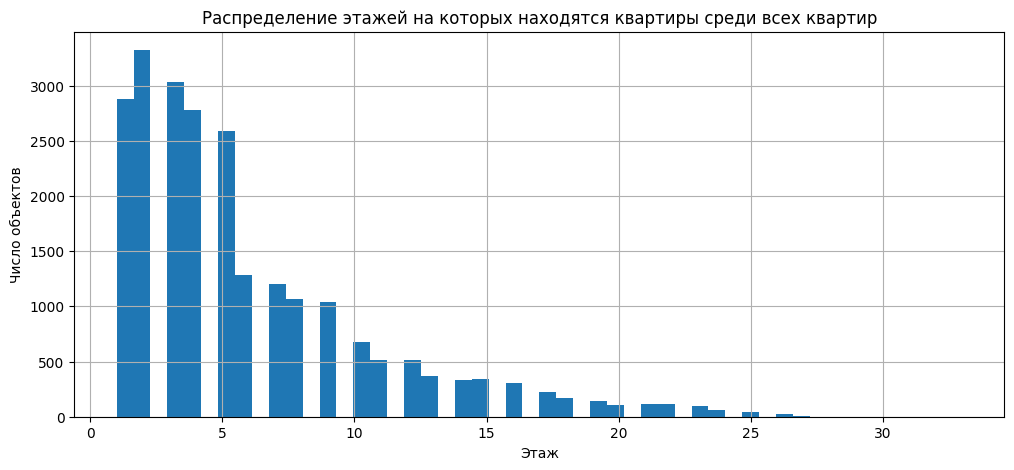

In [140]:
data['floor'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение этажей на которых находятся квартиры среди всех квартир');
plt.xlabel("Этаж");
plt.ylabel("Число объектов");

Среднее значение этажа квартиры 6 выше медианы 4. И это может означать то, что «элитные» квартиры расположены на более высоких этажах, относительно «стандартных» квартир. Либо то, что «элитные» квартиры расположены в более высотных домах. В большинстве случаев квартиры расположены от 2 до 8 этажей.

**4.8 тип этажа квартиры («первый», «последний», «другой»)**

In [141]:
data['type_of_floor'].describe()

count      23362
unique         3
top       другой
freq       17187
Name: type_of_floor, dtype: object

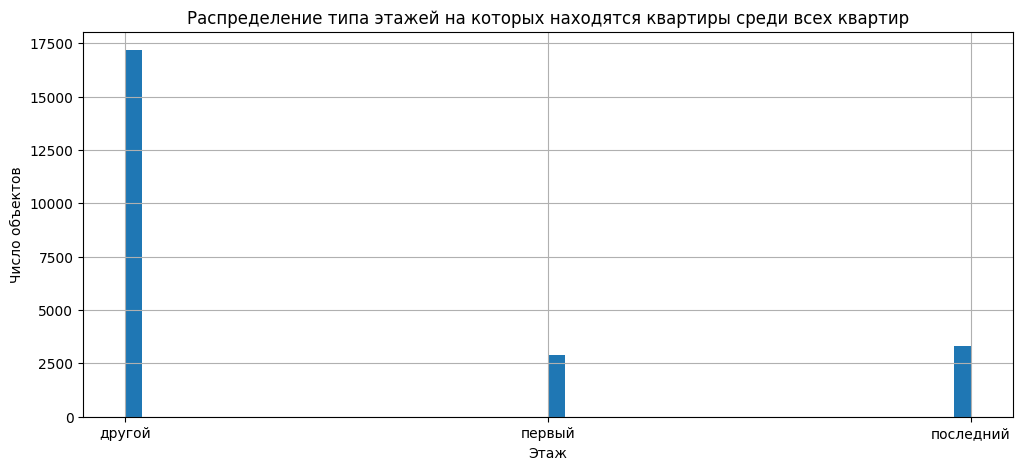

In [142]:
data['type_of_floor'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение типа этажей на которых находятся квартиры среди всех квартир');
plt.xlabel("Этаж");
plt.ylabel("Число объектов");

In [143]:
data.groupby(['type_of_floor']).sum().plot(kind='pie', autopct='%1.0f%%', y='last_price');

TypeError: datetime64 type does not support sum operations

Квартиры, в основном, расположены не на первом и не на последнем этаже - 76%. Но на последнем этаже больше - 13%, чем на первом - 11%.

**4.8 общее количество этажей в доме:**

In [ ]:
data['floors_total'].describe()

In [ ]:
data['floors_total'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение общего количества этажей в доме среди всех квартир');
plt.xlabel("Общее количество этажей в доме");
plt.ylabel("Число объектов");

In [ ]:
#удалим строки с общим количеством этажей в доме менее 31
data = data[data.floors_total < 31]

In [144]:
#выведем новую информацию о статистических характеристиках столбца 'floors_total'
data['floors_total'].describe()

count      23362.0
mean     10.674172
std       6.587641
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

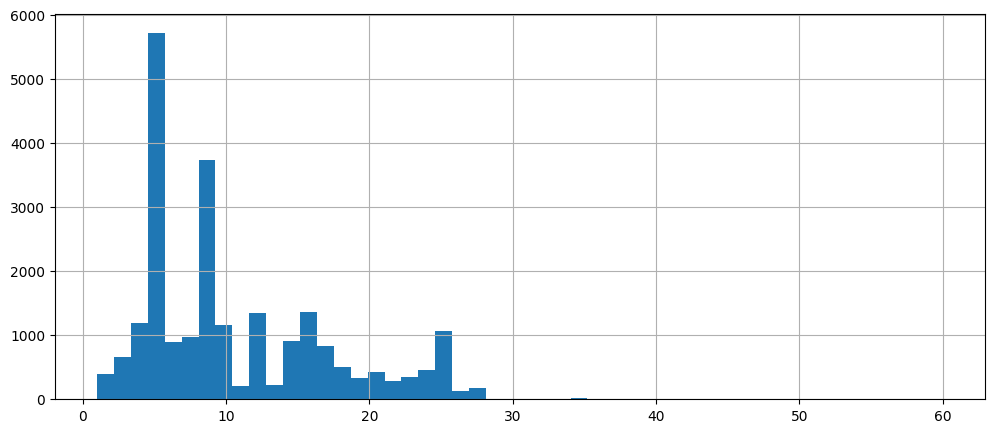

In [145]:
#построим гистограмму по обновлённым данным
data['floors_total'].hist(figsize=(12, 5), bins=50)
plt.show()

Среднее значение общего количества этажей в доме 10,6 выше медианы 9. И это может доказывать то, что «элитные» квартиры расположены в более высотных домах, относительно «стандартных» квартир. В большинстве случаев общее количество этажей в доме - от 5 до 16.

**4.8 расстояние до центра города в километрах:**

In [146]:
data['city_centers_nearest_km'].describe()

count    17949.000000
mean        14.196835
std          8.629678
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

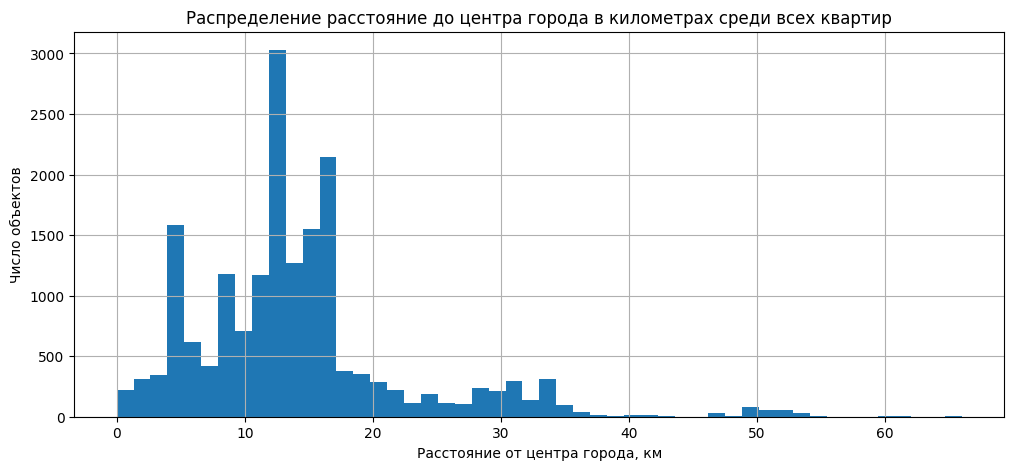

In [147]:
data['city_centers_nearest_km'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение расстояние до центра города в километрах среди всех квартир');
plt.xlabel("Расстояние от центра города, км");
plt.ylabel("Число объектов");

Среднее значение расстояния до центра города 14 км немного выше медианы 13 км. Скорее всего, основной вклад в отличие среднего от медианы вносит Санкт-Петербург из-за относительно большей площади и множества вариантов разброса месторасположения квартир по городу. В большинстве случаев расстояние до центра города составляет от 9 км до 16 км, что логично так как это "спальные районы" имеющие большую плотность населения. Меньше всего продаются квартир за городом в 40 и более км от центра Санкт-Петербурга.

**4.9 день и месяц публикации объявления:**

In [148]:
data['weekday_exposition'].describe()

count    23362.000000
mean         2.566133
std          1.786330
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

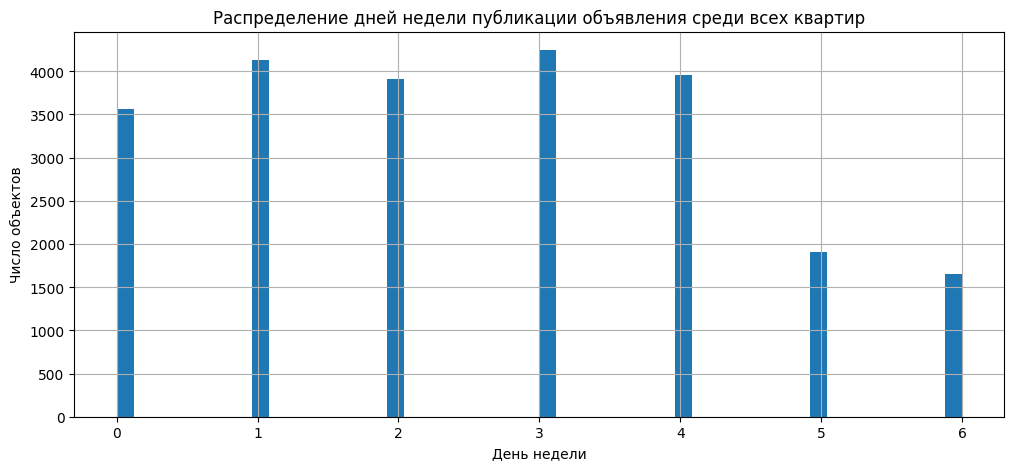

In [149]:
data['weekday_exposition'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение дней недели публикации объявления среди всех квартир');
plt.xlabel("День недели");
plt.ylabel("Число объектов");

В большинстве случаев объявления публиковались по будням, лидируют – вторник и четверг. Снижение активности пользователей происходит в выходные дни - субботу и воскресенье.

In [150]:
data['month_exposition'].describe()

count    23362.000000
mean         6.401849
std          3.493201
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

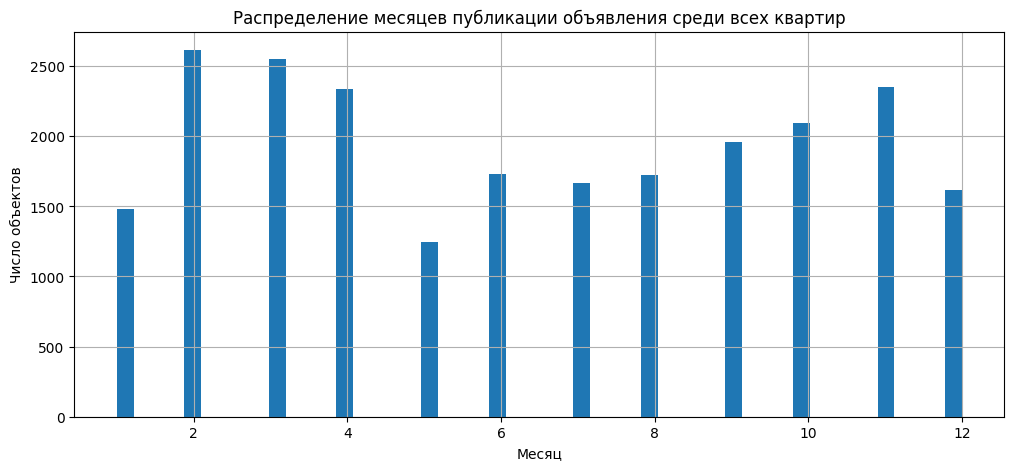

In [151]:
data['month_exposition'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение месяцев публикации объявления среди всех квартир');
plt.xlabel("Месяц");
plt.ylabel("Число объектов");

Из месяцев лидируют февраль, март, апрель и ноябрь. Провалы наблюдаются в январе, мае, декабре. Видимо, связано с праздниками и сезоном отпусков. 

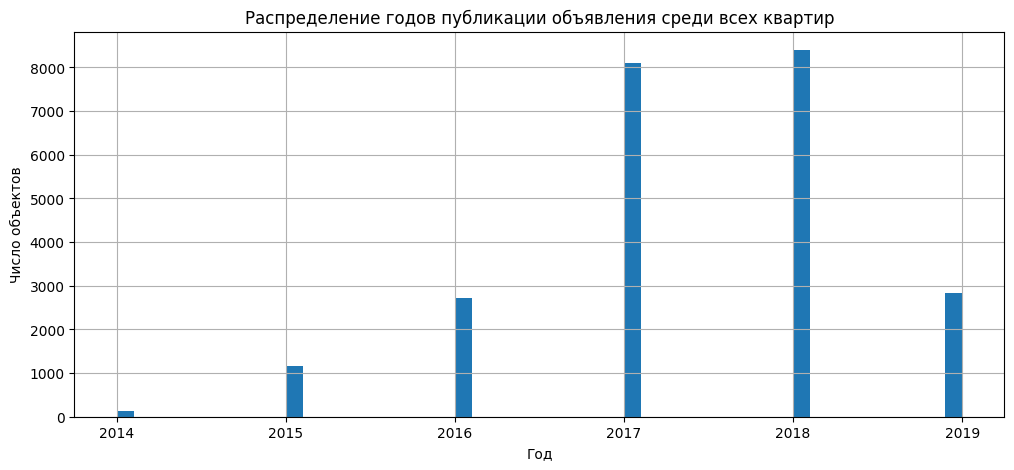

In [152]:
data['year_exposition'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение годов публикации объявления среди всех квартир');
plt.xlabel("Год");
plt.ylabel("Число объектов");

Годы-лидеры по количеству размещенных объявлений - 2017 и 2018.

**Изучим, как быстро продавались квартиры (столбец 'days_exposition').**
Этот параметр показывает, сколько дней было размещено каждое объявление


In [153]:
#посчитаем среднее и медиану.
data['days_exposition'].describe()

count       18581.0
mean     128.885636
std      121.582913
min             1.0
25%            41.0
50%            85.0
75%           183.0
max           512.0
Name: days_exposition, dtype: Float64

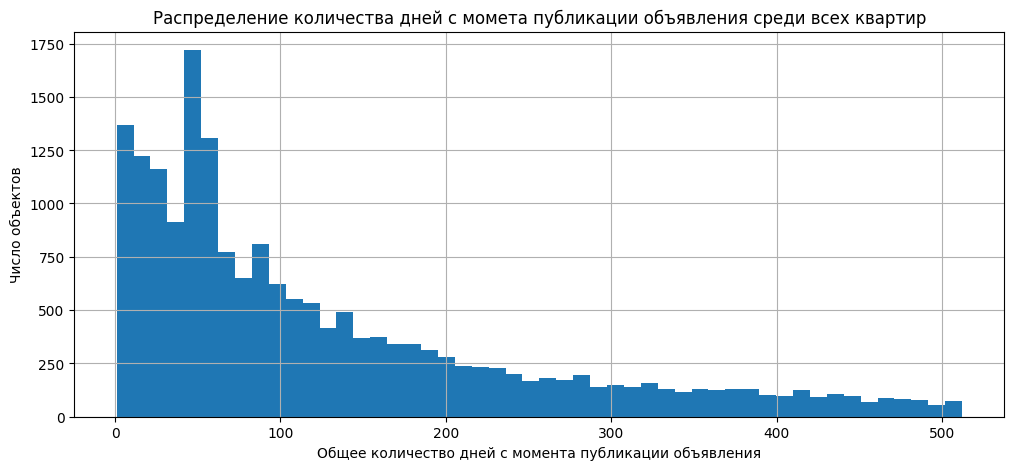

In [154]:
#построим гистограмму:
data['days_exposition'].hist(figsize=(12, 5), bins=50);
plt.title('Распределение количества дней с момета публикации объявления среди всех квартир');
plt.xlabel("Общее количество дней с момента публикации объявления");
plt.ylabel("Число объектов");

Среднее значение количества дней, в течение которых было размещено объявление, 128 дней больше медианы 85 дня. Это говорит о том, что в датафрейме есть объявления, которые были размещены очень большое количество дней. В большинстве случаев объявление было размещено от 41 до 183 дня. Это и есть время продажи. Быстрые продажи - от 1 до 41 дней, долгие - от 184 до 512 дней. 
 

Минимальное время продажи можно объяснить ошибочным размещением объявления или тем что пользователь передумал в процессе публикации объявления.

Максимальное время может свидетельствовать о наличии проблем с объектом продажи - завышена цена, неудобное место расположение, плохое состояние жилья и т.д. Возможно объявление просто забыли закрыть на сайте после продажи.

**4.3 Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.**


Изучим, зависит ли цена от следующих параметров:
общая площадь:

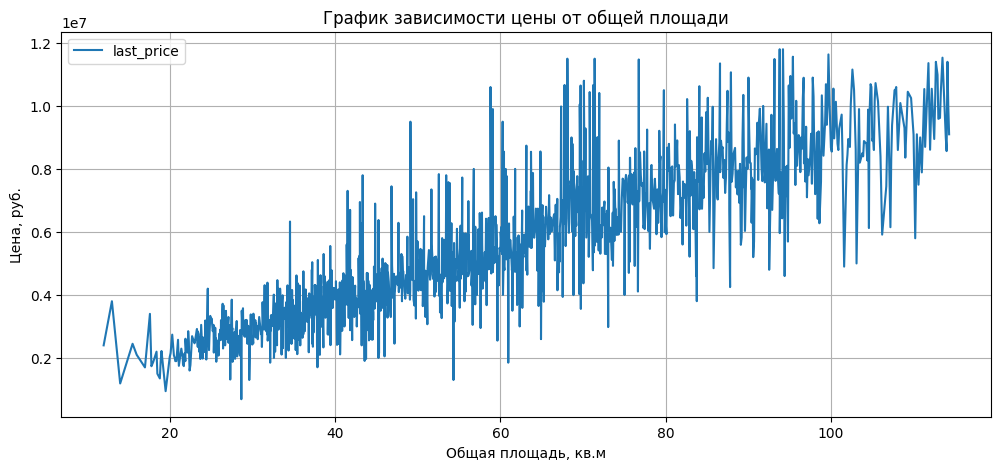

In [155]:
#общая площадь:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5));
plt.title('График зависимости цены от общей площади');
plt.xlabel("Общая площадь, кв.м");
plt.ylabel("Цена, руб.");

In [156]:
#для того, чтобы определить наличие линейной связи между величинами общей площади и общей (полной) стоимости объекта,
#найдём коэффициент корреляции Пирсона:
data['total_area'].corr(data['last_price'])

0.694212301097861

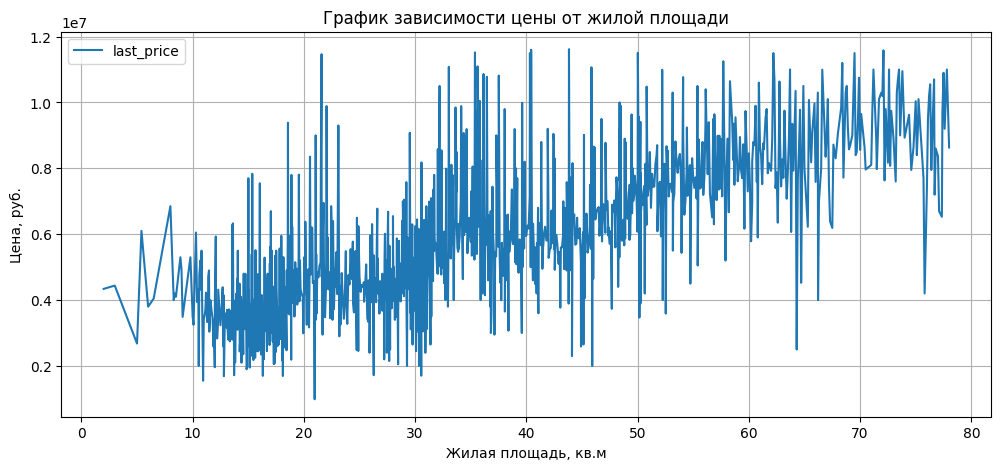

In [157]:
#жилая площадь:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, figsize=(12, 5));
plt.title('График зависимости цены от жилой площади');
plt.xlabel("Жилая площадь, кв.м");
plt.ylabel("Цена, руб.");

In [158]:
#для того, чтобы определить наличие линейной связи между величинами жилой площади и общей (полной) стоимости объекта,
#найдём коэффициент корреляции Пирсона:
data['living_area'].corr(data['last_price'])

0.5579632937232005

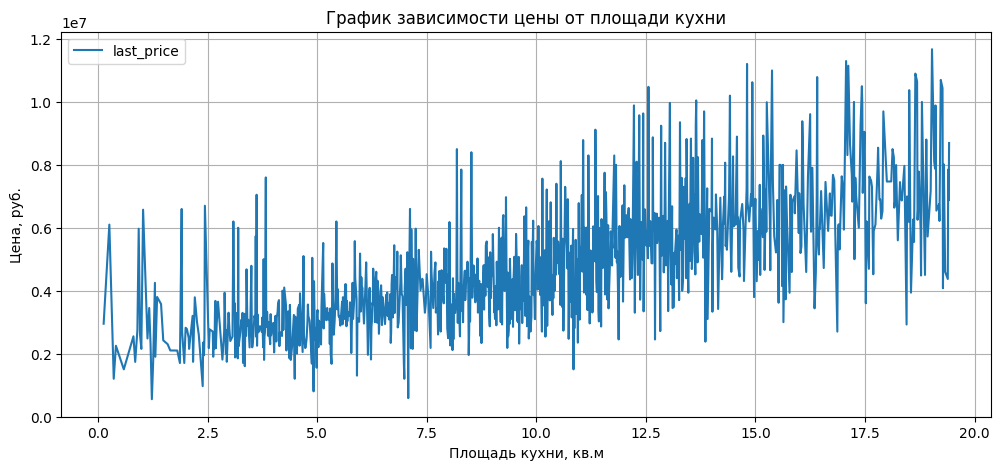

In [159]:
#площадь кухни:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, figsize=(12, 5));
plt.title('График зависимости цены от площади кухни');
plt.xlabel("Площадь кухни, кв.м");
plt.ylabel("Цена, руб.");

In [160]:
#для того, чтобы определить наличие линейной связи между величинами площадь кухни и общей (полной) стоимости объекта,
#найдём коэффициент корреляции Пирсона:
data['kitchen_area'].corr(data['last_price'])

0.49206868742109183

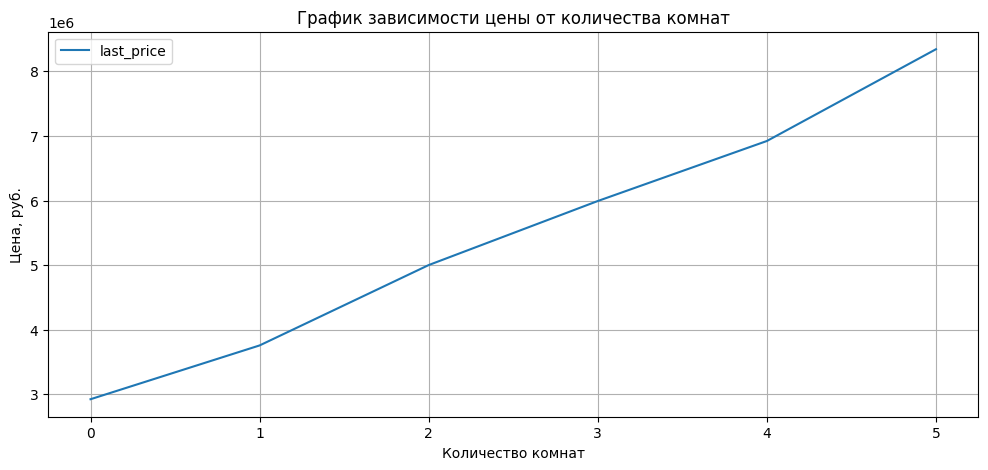

In [161]:
#количество комнат:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
plt.title('График зависимости цены от количества комнат');
plt.xlabel("Количество комнат");
plt.ylabel("Цена, руб.");

In [162]:
#для того, чтобы определить наличие линейной связи между величинами количества комнат и общей (полной) стоимости объекта,
#найдём коэффициент корреляции Пирсона:
data['rooms'].corr(data['last_price'])

0.45092289681807324

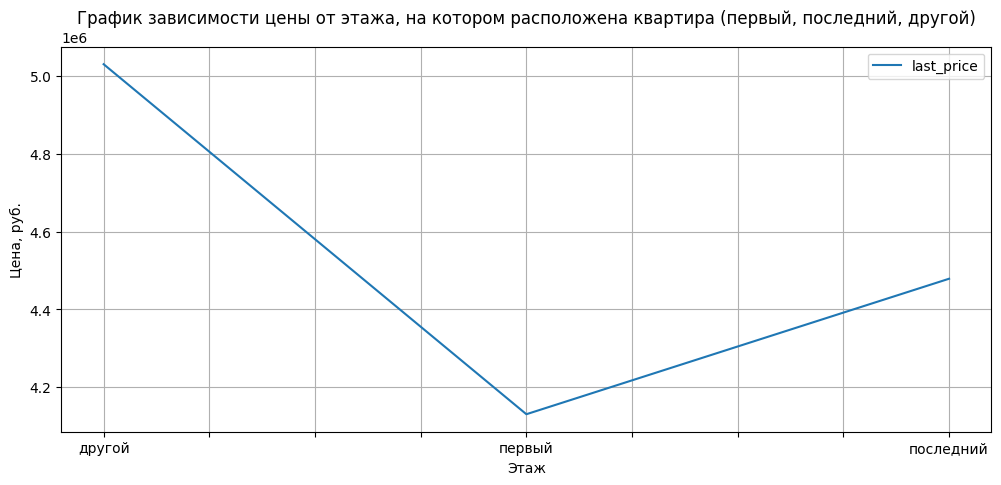

In [163]:
#этаж, на котором расположена квартира (первый, последний, другой):
data.pivot_table(index='type_of_floor', values='last_price').plot(grid=True, figsize=(12, 5));
plt.title('График зависимости цены от этажа, на котором расположена квартира (первый, последний, другой)');
plt.xlabel("Этаж");
plt.ylabel("Цена, руб.");

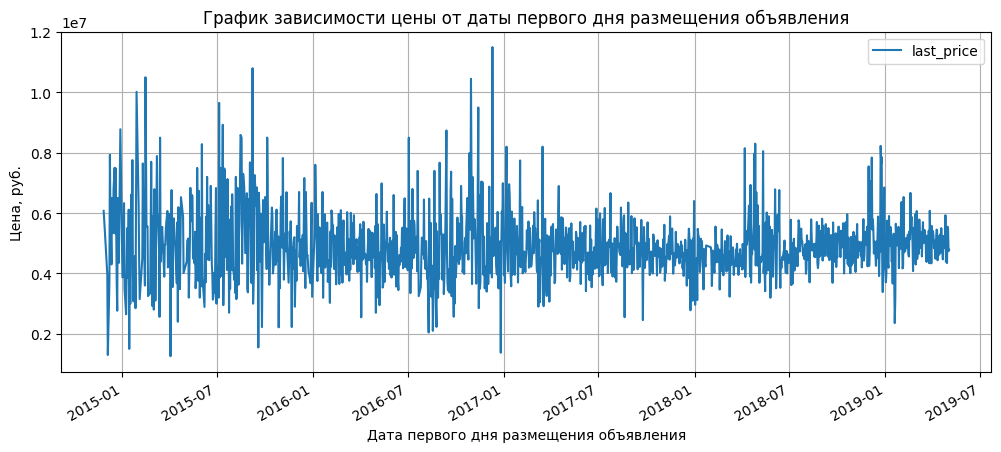

In [164]:
#дата размещения (день недели, месяц, год):
data.pivot_table(index='first_day_exposition', values='last_price').plot(grid=True, figsize=(12, 5));
plt.title('График зависимости цены от даты первого дня размещения объявления');
plt.xlabel("Дата первого дня размещения объявления");
plt.ylabel("Цена, руб.");

In [165]:
#выведем сводную таблицу корреляций цены за метр, общей стоимости, общей площади, жилой площади, площади кухни, количества комнат
corr = data[['one_meter_price','last_price','total_area','living_area','kitchen_area','rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

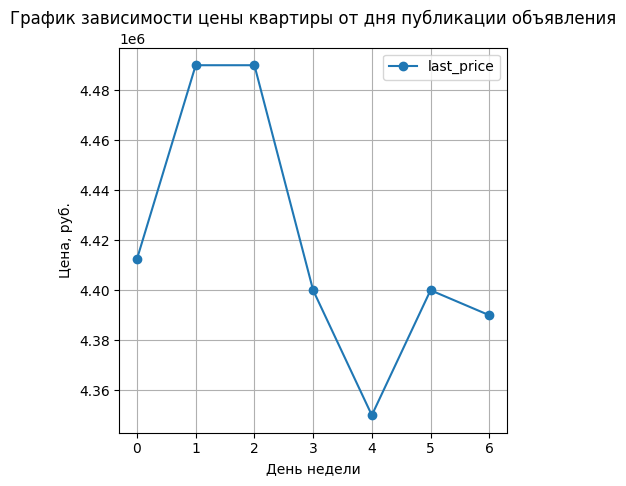

In [166]:
# посмотрим на распределия цены по дню недели объявления
# (data
#      .groupby('weekday_exposition')['last_price'].median()
#      .plot(kind='bar', title='График зависимости цены квартиры от дня недели публикации объявления')
#  );
data.pivot_table(index='weekday_exposition', values='last_price',aggfunc = 'median').plot(grid=True, style='o-', figsize=(5, 5));
plt.title('График зависимости цены квартиры от дня публикации объявления');
plt.xlabel("День недели");
plt.ylabel("Цена, руб.");

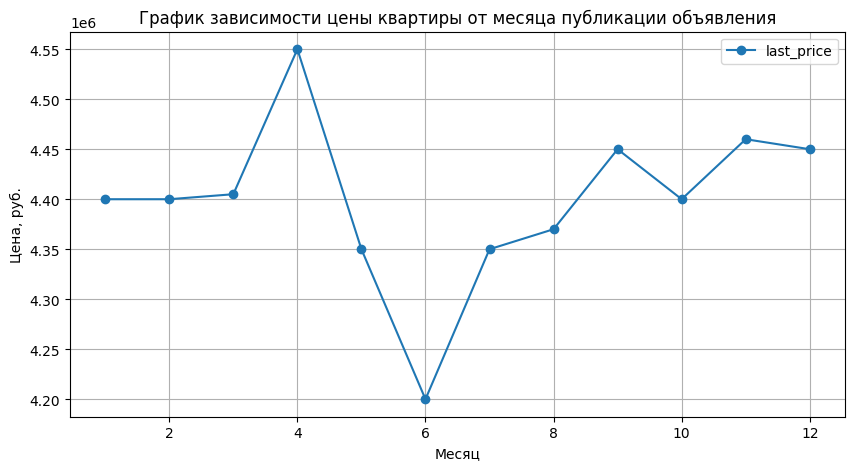

In [167]:
# посмотрим на распределия цены по месяцу публикации объявления
# (data
#      .groupby('month_exposition')['last_price'].median()
#      .plot(kind='bar', figsize=(10, 5))
#  );
data.pivot_table(index='month_exposition', values='last_price',aggfunc = 'median').plot(grid=True, style='o-', figsize=(10, 5));
plt.title('График зависимости цены квартиры от месяца публикации объявления');
plt.xlabel("Месяц");
plt.ylabel("Цена, руб.");

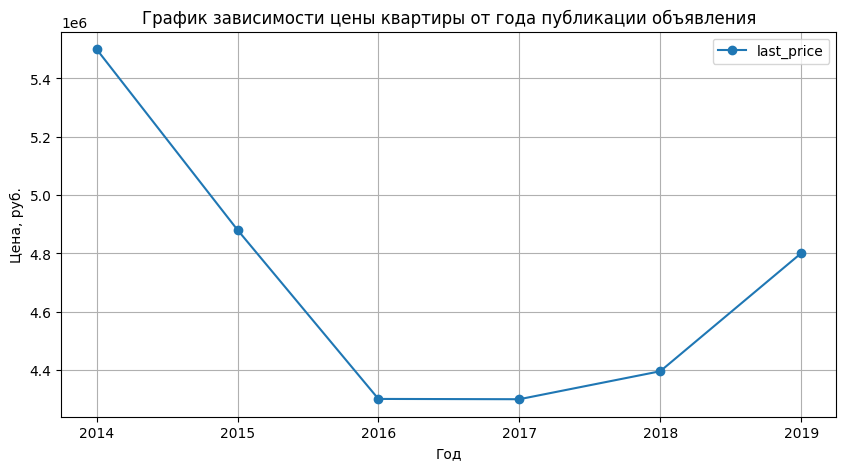

In [168]:
# (data
#      .groupby('year_exposition')['last_price'].median()
#      .plot(kind='bar',figsize=(10,5))
#  );
data.pivot_table(index='year_exposition', values='last_price',aggfunc = 'median').plot(grid=True, style='o-', figsize=(10, 5));
plt.title('График зависимости цены квартиры от года публикации объявления');
plt.xlabel("Год");
plt.ylabel("Цена, руб.");

О наличии линейной зависимости между величинами говорит коэффициент корреляции Пирсона. Коэффициент корреляции Пирсона для зависимоти между общей (полной) стоимостью объекта и:

- общей площадью составляет 0,69 (чем больше площадь, тем выше цена);
- жилой площадью - 0,56 (чем больше площадь, тем выше цена);
- площадью кухни - 0,49;
- количеством комнат - 0,45.
Таким образом, зависимость существует. Больше всего от общей площади, меньше - от количества комнат.

Типы данных для этажа, на котором расположена квартира и даты размещения не являются числовыми, поэтому коэффициент корреляции Пирсона к ним применить нельзя. Тем не менее, из графика видно, что стоимость квартир на первом этаже - ниже стоимости квартир на других этажах. Разница в стоимости квартир между последним и другими этажами - несущественная.

Объявления с наибольшей  общей (полной) стоимостью объекта, дугими словами самые "дорогие" были размещены во вторник и среду.

Самые высокие цены на продаваемые квартиры установлены апреле, на втором и третьем месте ноябрь и декабрь.

Стоимость недвижимости падала с 2014 до 2017 года, а далее начала увеличиваться.


**4.4 Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [169]:
#выведем список 10 населённых пунктов с наибольшим числом объявлений:
data.value_counts('locality_name').head(10)

locality_name
Санкт-Петербург      15515
поселок Мурино         544
поселок Шушары         437
Всеволожск             392
Пушкин                 368
Колпино                337
поселок Парголово      325
Гатчина                303
деревня Кудрово        297
Выборг                 235
Name: count, dtype: int64

In [170]:
#посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
top_10_one_meter_price = (data.pivot_table(index='locality_name', 
                           aggfunc={'last_price':'count', 'one_meter_price':'mean'}).
          sort_values(by='last_price', ascending=False)).head(10)
top_10_one_meter_price.sort_values(by='one_meter_price')

last_price  one_meter_price
locality_name                                 
Выборг                    234     58290.543109
Всеволожск                391     68552.215572
Гатчина                   301     68625.141404
Колпино                   335     75480.547446
поселок Шушары            437     78484.151287
поселок Мурино            544     85472.022295
поселок Парголово         325     90291.780571
деревня Кудрово           296     92396.152708
Пушкин                    337    103180.403394
Санкт-Петербург         13562    114711.406488

По количеству объявлений о продаже квартир лидирует Санкт-Петербург. Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург, с самой низкой - Выборг.

**4.5 Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.**

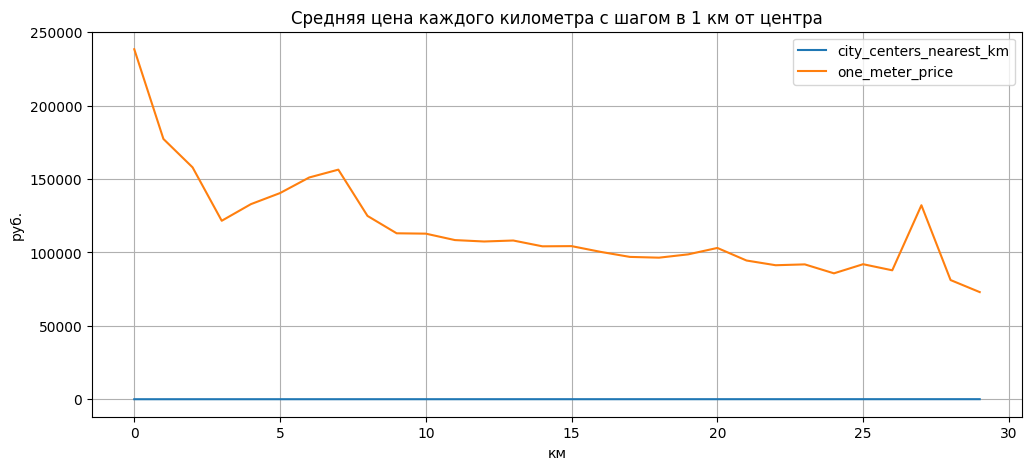

In [171]:
#выделим квартиры в Санкт-Петербурге с помощью столбца locality_name
#построим график изменения средней стоимости квадратного метра в зависимости от удаленности от центра СПб
price_by_city_center = data[data['locality_name'] == 'Санкт-Петербург']\
.pivot_table(index='city_centers_nearest_km', values='one_meter_price', aggfunc='mean')\
.reset_index().plot(grid=True, figsize=(12, 5));
plt.title('Средняя цена каждого километра с шагом в 1 км от центра');
plt.xlabel('км');
plt.ylabel('руб.');

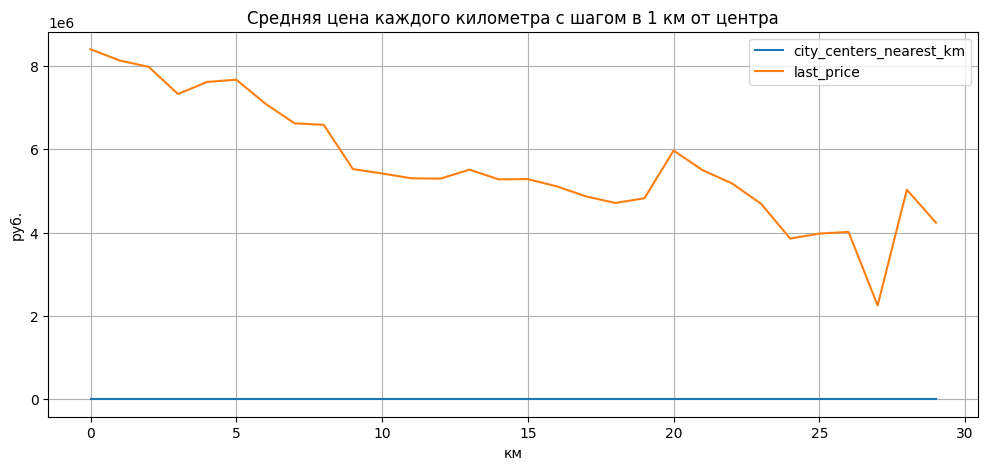

In [172]:
#выделим квартиры в Санкт-Петербурге с помощью столбца locality_name
#построим график изменения общей стоимости в зависимости от удаленности от центра СПб
price_by_city_center = data[data['locality_name'] == 'Санкт-Петербург']\
.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')\
.reset_index().plot(grid=True, figsize=(12, 5));
plt.title('Средняя цена каждого километра с шагом в 1 км от центра');
plt.xlabel('км');
plt.ylabel('руб.');

С возрастанием близости квартиры к центру Санкт-Петербурга стоимость жилья преимущественно растет. Также на графике имеется пик роста средней цены километра на расстоянии 27 км от центра Санкт-Петербурга. Предположу что это сегмент загородного "элитного" жилья.

### Общий вывод

Проведено исследование с целью вывыявления интересных особенностей и зависимостей, которые существуют на рынке недвижимости.

Входные данные - данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

В результате были выявлены следующие зависимости влияющие на общую (полную) стоимость объекта:
 - общая площадь влияет на общую (полную) стоимость объекта - чем больше площадь, тем выше цена;
 - жилая площадь влияет на общую (полную) стоимость объекта - чем больше площадь, тем выше цена;
 - площадь кухни влияет на общую (полную) стоимость объекта;
 - количество комнат влияет на общую (полную) стоимость объекта;
 - этаж, на котором расположена квартира (первый, последний, другой) влияет на общую (полную) стоимость объекта - стоимость квартир на первом этаже - ниже стоимости квартир на других этажах. Разница в стоимости квартир между последним и другими этажами несущественная. 
 
 Зависимость роста общей стоимости объектов от даты размещения, в целом, за несколько лет не выявлена. 

В большинстве случаев объявления публиковались по будням, лидируют – вторник и четверг. Снижение активности пользователей происходит в выходные дни - субботу и воскресенье. Самые "дорогие" были размещены во вторник и среду.

Из месяцев по количеству объвлений лидируют февраль, март, апрель и ноябрь. Провалы наблюдаются в январе, мае, декабре. Видимо, связано с праздниками и сезоном отпусков. Самые высокие цены на продаваемые квартиры установлены апреле, на втором и третьем месте ноябрь и декабрь.

Годы-лидеры по количеству размещенных объявлений - 2017 и 2018.Средняя стоимость недвижимости падала с 2014 до 2017 года, а далее начала увеличиваться. Возможно это связано с экономическим кризисом в России 2014—2015 гг, а именно резким ослаблением российского рубля по отношению к иностранным валютам, вызванным стремительным снижением мировых цен на нефть, от экспорта которой во многом зависит доходная часть бюджета России, а также введением экономических санкций в отношении России в связи с вхождения Крыма в состав РФ. В 2018 и 2019 зафиксирован рост средней общей стоимости недвижимости. Вероятно доходы населения начали расти, что косвено может быть подтверждено тем, что Консолидированный бюджет РФ в 2018 году исполнен с профицитом — впервые за последние семь лет. Также в 2018 году Россия поставила абсолютный рекорд по добыче нефти, поставкам газа в Европу и экспорту пшеницы. В 2018 году была снижена средняя ставка по ипотеке по сравнению с предыдущим годом. Что, как показала практика, обычно ведёт к росту цен на недвижимость.


В разрезе 10 населённых пунктов с наибольшим числом объявлений, выставленых на продажу объектов недвижимости, самым дорогим является Санкт-Петербург (114 621 руб.за м2), самым бюджетным оказался Выборг (58 290 руб.за м2).

С возрастанием близости квартиры к центру Санкт-Петербурга общая стоимость жилья и стоимость квадратного метра преимущественно растет.

**Общие рекомендации:**

- уделить внимание правилам валидации на сервере, чтобы исключить проблему отсутствующих значений;
- продумать сценарий автоматического добавления серии дома, для получения корректных данных о высоте потолков;
- проверить как влияет высота потолков и серия дома на общую (полную) стоимость объекта.